In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import sys
Path = '/remote/tychodata/ftairli/work/Projects/FD_Reconstruction/Code/'
if Path not in sys.path:
    sys.path.append(Path)

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

In [21]:
# OLD DATA - Before Cuts

# # Best Performance for each model

# Variables = ['SDP_Theta', 'SDP_Phi','Chi0' ,'Rp', 'Xmax'  ,'Energy','Other']
# Units     = ['deg'      , 'deg'    ,'deg'  ,'km', '10g/cm2' ,'10%'   ,'%']

# RecPerf   = {'SDP_Theta':0.54774,'SDP_Phi':0.19252 ,'Chi0':0.40264 ,'Rp':0.03790 ,'Xmax':1.95 ,'Energy':.67  ,'Other':1 }
# ConvPerf  = {'SDP_Theta':0.66218,'SDP_Phi':0.31257 ,'Chi0':3.7891  ,'Rp':0.7214  ,'Xmax':0    ,'Energy':0    ,'Other':1 }
# ReccPerf  = {'SDP_Theta':1.935  ,'SDP_Phi':2.77    ,'Chi0':2.51    ,'Rp':0.427   ,'Xmax':0    ,'Energy':0.   ,'Other':1 } 
# GraphPerf = {'SDP_Theta':2.51   ,'SDP_Phi':3.4     ,'Chi0':6.2     ,'Rp':1.2     ,'Xmax':0    ,'Energy':0.0  ,'Other':1 }

# # # Best Performance for each model

# RecPerf   = {'SDP_Theta':0.54774,'SDP_Phi':0.19252 ,'Chi0':0.40264 ,'Rp':0.03790 ,'Xmax':1.95 ,'Energy':.67  ,'Other':1 }
# ConvPerf  = {'SDP_Theta':0.66218,'SDP_Phi':0.31257 ,'Chi0':1.8     ,'Rp':0.371   ,'Xmax':3.63 ,'Energy':1.3  ,'Other':1 }
# ReccPerf  = {'SDP_Theta':1.935  ,'SDP_Phi':2.77    ,'Chi0':2.51    ,'Rp':0.427   ,'Xmax':0    ,'Energy':0.   ,'Other':1 } 
# GraphPerf = {'SDP_Theta':2.51   ,'SDP_Phi':3.4     ,'Chi0':6.2     ,'Rp':1.2     ,'Xmax':0    ,'Energy':0.0  ,'Other':1 }


# Summary Plot


In [22]:
# Best Performance for each model

Variables = ['SDP_Theta', 'SDP_Phi','Chi0' ,'Rp', 'Xmax'  ,'Energy']#,'Other']
Units     = ['deg'      , 'deg'    ,'deg'  ,'km', '10g/cm2' ,'10%' ]#  ,'%']

# # Best Performance for each model



RecPerf   = {'SDP_Theta':0.548  ,'SDP_Phi':0.171   ,'Chi0':0.385   ,'Rp':0.03790 ,'Xmax':1.95 ,'Energy':.67 }# ,'Other':1 }
ConvPerf  = {'SDP_Theta':0.524  ,'SDP_Phi':0.231   ,'Chi0':1.8     ,'Rp':0.371   ,'Xmax':3.63 ,'Energy':1.3 }# ,'Other':1 }
ReccPerf  = {'SDP_Theta':1.935  ,'SDP_Phi':0.518   ,'Chi0':2.51    ,'Rp':0.427   ,'Xmax':0    ,'Energy':0.  }# ,'Other':1 } 
GraphPerf = {'SDP_Theta':0.634  ,'SDP_Phi':0.207   ,'Chi0':2.97    ,'Rp':0.727   ,'Xmax':0    ,'Energy':0.0 }# ,'Other':1 }

colors    = {'Rec':'grey','Conv':'blue','Recc':'green','Graph':'red'}

9.75


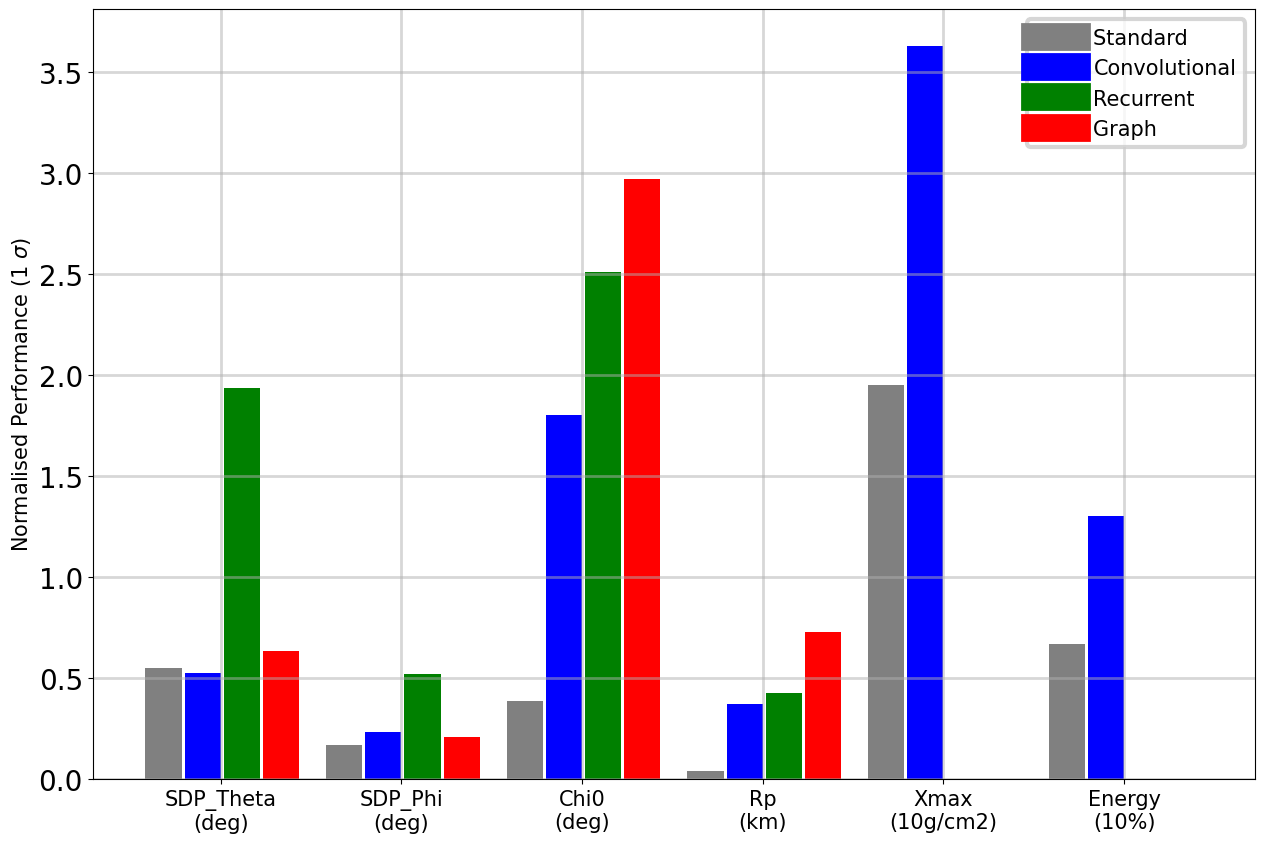

In [23]:
plt.style.use('AngularDeviation.mplstyle')
plt.figure(figsize=(15,10))


bar_width = 0.2  # 4 bars
bar_gap   = 0.05/3 # 3 gaps
bar_break = 0.1  # 1 break

for i,Var in enumerate(Variables[:6]):
    plt.bar(i-1.5*bar_width-bar_gap   ,RecPerf  [Var]   ,bar_width,color=colors['Rec']   ,label='Rec')
    plt.bar(i-0.5*bar_width           ,ConvPerf [Var]   ,bar_width,color=colors['Conv']  ,label='Conv')
    plt.bar(i+0.5*bar_width+bar_gap   ,ReccPerf [Var]   ,bar_width,color=colors['Recc']  ,label='Recc')
    plt.bar(i+1.5*bar_width+2*bar_gap ,GraphPerf[Var]   ,bar_width,color=colors['Graph'] ,label='Graph')

plt.ylabel('Normalised Performance (1 $\sigma$)',fontsize=15)
Xticklabels = [Var+'\n('+Unit+')' for Var,Unit in zip(Variables,Units)]
plt.xticks(range(len(Variables)),Xticklabels,fontsize=15)

custom_lines = [Line2D([0], [0], color=colors['Rec']  , lw=20),
                Line2D([0], [0], color=colors['Conv'] , lw=20),
                Line2D([0], [0], color=colors['Recc'] , lw=20),
                Line2D([0], [0], color=colors['Graph'], lw=20)]

plt.legend(custom_lines, ['Standard     ', 'Convolutional', 'Recurrent    ', 'Graph        '],fontsize=15)
# plt.grid()
# plt.title('Best Performance so far compared to Standard Reconstruction',fontsize=15)

Max_Y = max(list(RecPerf.values()))*5
print(Max_Y)

# plt.ylim(0,Max_Y)
# plt.yscale('log')

In [24]:
print(Variables)

['SDP_Theta', 'SDP_Phi', 'Chi0', 'Rp', 'Xmax', 'Energy']


9.75


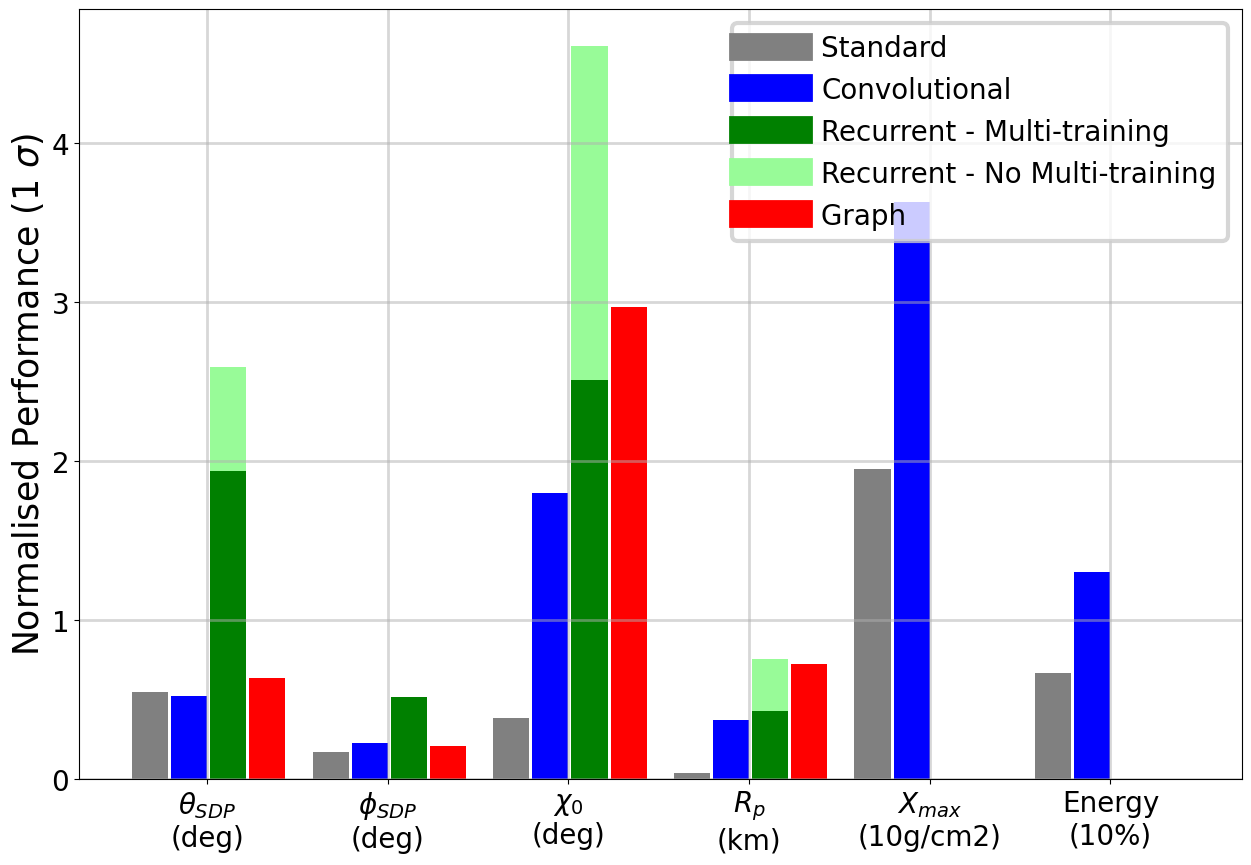

In [25]:
# Best Performance plot with extended recurrent model
# plt.style.use('default')
plt.style.use('AngularDeviation.mplstyle')
plt.figure(figsize=(15,10))


bar_width = 0.2  # 4 bars
bar_gap   = 0.05/3 # 3 gaps
bar_break = 0.1  # 1 break

for i,Var in enumerate(Variables[:6]):
    plt.bar(i-1.5*bar_width-bar_gap   ,RecPerf  [Var]   ,bar_width,color=colors['Rec']   ,label='Rec')
    plt.bar(i-0.5*bar_width           ,ConvPerf [Var]   ,bar_width,color=colors['Conv']  ,label='Conv')
    plt.bar(i+0.5*bar_width+bar_gap   ,ReccPerf [Var]   ,bar_width,color=colors['Recc']  ,label='Recc')
    plt.bar(i+1.5*bar_width+2*bar_gap ,GraphPerf[Var]   ,bar_width,color=colors['Graph'] ,label='Graph')

# Extra Recurrent Model information
ReccPerf2  = {'SDP_Theta':2.59  ,'SDP_Phi':0.518    ,'Chi0':4.61   ,'Rp':0.753   ,'Xmax':0    ,'Energy':0.  }# ,'Other':1 } 
for i,Var in enumerate(Variables[:6]):
    plt.bar(i+0.5*bar_width+bar_gap ,ReccPerf2[Var]   ,bar_width,color='palegreen' ,label='Recc',zorder = -1)
    
plt.ylabel('Normalised Performance (1 $\sigma$)')
LatexXlabels = {'SDP_Theta':'$\\theta_{SDP}$', 'SDP_Phi':'$\\phi_{SDP}$','Chi0':'$\\chi_0$' ,'Rp':'$R_p$', 'Xmax':'$X_{max}$'  ,'Energy':'Energy'}
Xticklabels = [LatexXlabels[Var]+'\n('+Unit+')' for Var,Unit in zip(Variables,Units)]
plt.xticks(range(len(Variables)),Xticklabels)

custom_lines = [Line2D([0], [0], color=colors['Rec']  , lw=20),
                Line2D([0], [0], color=colors['Conv'] , lw=20),
                Line2D([0], [0], color=colors['Recc'] , lw=20),
                Line2D([0], [0], color='palegreen'    , lw=20),
                Line2D([0], [0], color=colors['Graph'], lw=20)]

plt.legend(custom_lines, ['Standard     ', 'Convolutional', 'Recurrent - Multi-training','Recurrent - No Multi-training', 'Graph        '])
# plt.grid()
# plt.title('Best Performance so far compared to Standard Reconstruction',fontsize=15)

Max_Y = max(list(RecPerf.values()))*5
print(Max_Y)

# plt.ylim(0,Max_Y)
# plt.yscale('log')
plt.savefig('Summary.pdf')

(0.0, 20.0)

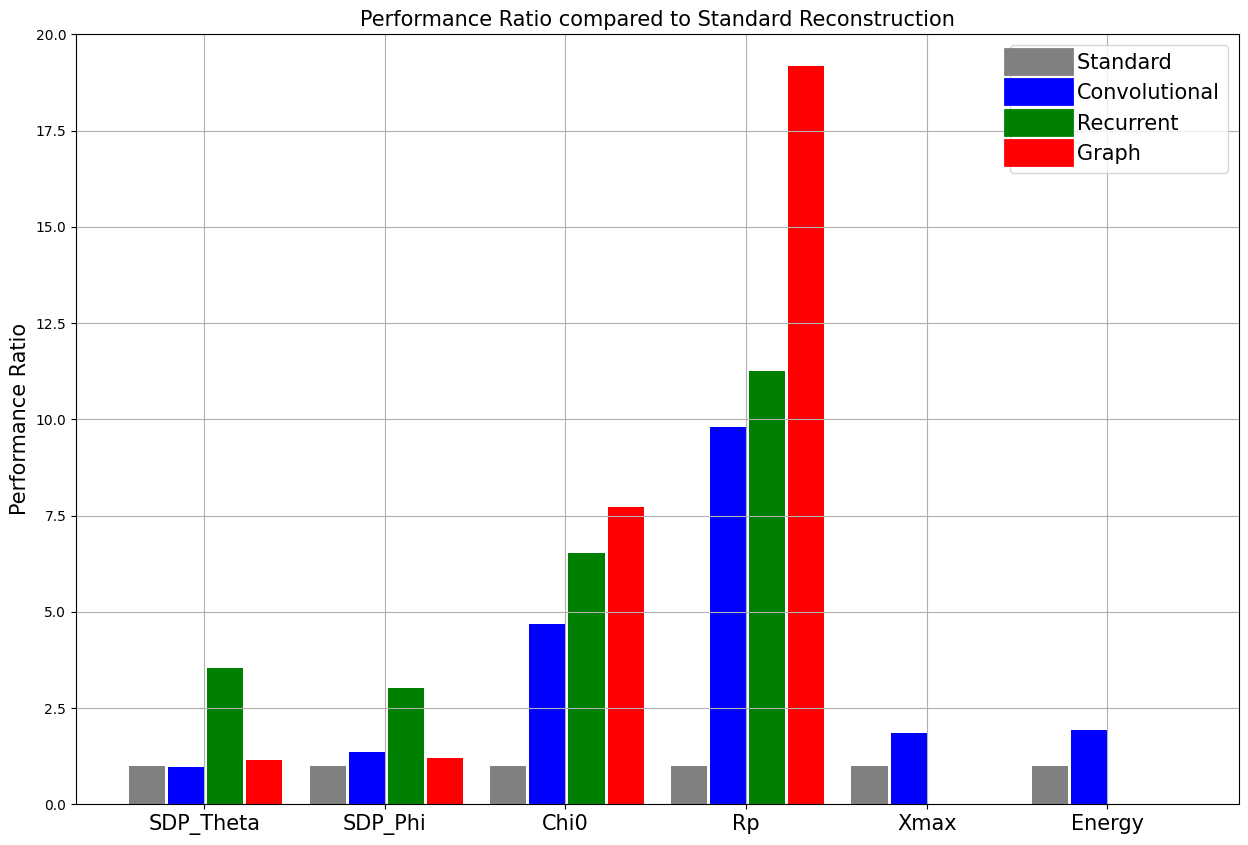

In [26]:
# Now i need to plot the ratio to the standard reconstruction
plt.style.use('default')
plt.figure(figsize=(15,10))

for i,Var in enumerate(Variables[:6]):
    plt.bar(i-1.5*bar_width-bar_gap   ,RecPerf  [Var]/RecPerf  [Var]   ,bar_width,color=colors['Rec']   ,label='Rec')
    plt.bar(i-0.5*bar_width           ,ConvPerf [Var]/RecPerf  [Var]   ,bar_width,color=colors['Conv']  ,label='Conv')
    plt.bar(i+0.5*bar_width+bar_gap   ,ReccPerf [Var]/RecPerf  [Var]   ,bar_width,color=colors['Recc']  ,label='Recc')
    plt.bar(i+1.5*bar_width+2*bar_gap ,GraphPerf[Var]/RecPerf  [Var]   ,bar_width,color=colors['Graph'] ,label='Graph')

plt.ylabel('Performance Ratio',fontsize=15)
Xticklabels = [Var for Var,Unit in zip(Variables,Units)]
plt.xticks(range(len(Variables)),Xticklabels,fontsize=15)

custom_lines = [Line2D([0], [0], color=colors['Rec']  , lw=20),
                Line2D([0], [0], color=colors['Conv'] , lw=20),
                Line2D([0], [0], color=colors['Recc'] , lw=20),
                Line2D([0], [0], color=colors['Graph'], lw=20)]

plt.legend(custom_lines, ['Standard     ', 'Convolutional', 'Recurrent    ', 'Graph        '],fontsize=15)
plt.grid()
plt.title('Performance Ratio compared to Standard Reconstruction',fontsize=15)

plt.ylim(0,20)
# plt.yscale('log')


# Comparing SDP Angular Deviation


All of the data will be processed individually in the respective model folders and here is the input for the numpy arrays
Each should have an overflow bin. 
Lets say for SDP we will have a total of 3 degrees in 100 bins + one overflow bin (the overflow bin is added to the last of the 100 bins)

here is the code that produces the data for the thing:



In [27]:
try:
    torch.tensor([1])
    SDPTheta_index =  TruthKeys.index('SDPTheta')
    SDPPhi_index   =  TruthKeys.index('SDPPhi')
    SDP_units      = TruthUnits[SDPTheta_index] if TruthUnits[SDPTheta_index] == TruthUnits[SDPPhi_index] else None
    assert SDP_units == 'rad' or SDP_units == 'deg', 'SDP units must be in radians or degrees'

    # Normalize the vectors to unit vectors
    def normalize_vectors(vectors):
        norms = np.linalg.norm(vectors, axis=1)
        return vectors / norms[:, np.newaxis]

    # Compute the angular deviation
    def compute_angular_deviation(truth, pred, rec):
        truth = normalize_vectors(truth)
        pred = normalize_vectors(pred)
        rec = normalize_vectors(rec)
        

        pred_dot_product = np.einsum('ij,ij->i', truth, pred)
        rec_dot_product = np.einsum('ij,ij->i', truth, rec)
        
        pred_ang_div = np.arccos(np.clip(pred_dot_product, -1.0, 1.0))
        rec_ang_div = np.arccos(np.clip(rec_dot_product, -1.0, 1.0))

        return pred_ang_div, rec_ang_div

    def angles_to_vector(Thetas,Phis):
        X = np.sin(Thetas)*np.cos(Phis)
        Y = np.sin(Thetas)*np.sin(Phis)
        Z = np.cos(Thetas)
        return np.array([X,Y,Z]).T



    if SDP_units == 'deg':
        Truth_Vecs = angles_to_vector(np.deg2rad(Truth[:,SDPTheta_index]),np.deg2rad(Truth[:,SDPPhi_index]))
        Pred_Vecs  = angles_to_vector(np.deg2rad(Pred [:,SDPTheta_index]),np.deg2rad(Pred [:,SDPPhi_index]))
        Rec_Vecs   = angles_to_vector(np.deg2rad(Rec  [:,SDPTheta_index]),np.deg2rad(Rec  [:,SDPPhi_index]))
    else:
        Truth_Vecs = angles_to_vector(Truth[:,SDPTheta_index],Truth[:,SDPPhi_index])
        Pred_Vecs  = angles_to_vector(Pred [:,SDPTheta_index],Pred [:,SDPPhi_index])
        Rec_Vecs   = angles_to_vector(Rec  [:,SDPTheta_index],Rec  [:,SDPPhi_index])

    # Example usage
    angular_deviation_pred, angular_deviation_rec = compute_angular_deviation(Truth_Vecs, Pred_Vecs, Rec_Vecs)
    # Convert to deg
    angular_deviation_pred = np.rad2deg(angular_deviation_pred)
    angular_deviation_rec  = np.rad2deg(angular_deviation_rec)

    nbins = 100
    Range = (0,3)

    bins = np.concatenate([np.linspace(Range[0], Range[1], nbins-1), [np.inf]])

    plt.figure(figsize=(10, 10)) 

    counts,bin_edges = np.histogram(angular_deviation_pred, bins=bins)
    print('Model Values')
    print('Counts',counts.tolist())
    print('Bin Edges',bin_edges.tolist())
    counts[-2] += counts[-1]
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.bar(bin_centers[:-1], counts[:-1], width=np.diff(bin_edges[:-1]), align="edge", label='Model')

    counts,bin_edges = np.histogram(angular_deviation_rec, bins=bins)
    print('Reconstruction Values')
    print('Counts',counts.tolist())
    print('Bin Edges',bin_edges.tolist())
    counts[-2] += counts[-1]
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.bar(bin_centers[:-1], counts[:-1], width=np.diff(bin_edges[:-1]), align="edge", label='Reconstruction', alpha=0.7)

    plt.axvline(np.percentile(angular_deviation_pred, 68), color='blue'  , linestyle='--', label='68th Percentile Pred')
    plt.axvline(np.percentile(angular_deviation_rec , 68), color='orange', linestyle='--', label='68th Percentile Rec')
    print('Sigma Pred: ',np.percentile(angular_deviation_pred, 68))
    print('Sigma Rec : ',np.percentile(angular_deviation_rec, 68))

    plt.xlabel(f'Angular Deviation {SDP_units}')
    plt.ylabel('Counts')
    plt.legend()
    plt.grid()
    plt.show()


except:
    pass


In [28]:
# Load the data (if any prints are false, this is bad)
Rec_SDP_AngDiv_counts      = np.array([2523, 3151, 3444, 3408, 2959, 3021, 2621, 2522, 2262, 2073, 1948, 1823, 1645, 1544, 1410, 1346, 1266, 1151, 1091, 965, 958, 883, 840, 759, 674, 670, 624, 606, 552, 532, 514, 495, 475, 446, 367, 387, 361, 355, 351, 301, 317, 298, 271, 267, 298, 249, 214, 247, 199, 200, 195, 187, 184, 181, 196, 154, 184, 136, 148, 137, 141, 116, 104, 117, 113, 99, 117, 110, 95, 88, 94, 101, 101, 82, 61, 85, 79, 74, 84, 59, 64, 62, 72, 66, 50, 55, 53, 43, 46, 57, 52, 46, 41, 43, 39, 35, 52, 40, 1199])
Rec_SDP_AngDiv_bin_edges   = np.array([0.0, 0.030612244897959183, 0.061224489795918366, 0.09183673469387754, 0.12244897959183673, 0.15306122448979592, 0.18367346938775508, 0.21428571428571427, 0.24489795918367346, 0.2755102040816326, 0.30612244897959184, 0.336734693877551, 0.36734693877551017, 0.3979591836734694, 0.42857142857142855, 0.45918367346938777, 0.4897959183673469, 0.5204081632653061, 0.5510204081632653, 0.5816326530612245, 0.6122448979591837, 0.6428571428571428, 0.673469387755102, 0.7040816326530612, 0.7346938775510203, 0.7653061224489796, 0.7959183673469388, 0.826530612244898, 0.8571428571428571, 0.8877551020408163, 0.9183673469387755, 0.9489795918367346, 0.9795918367346939, 1.010204081632653, 1.0408163265306123, 1.0714285714285714, 1.1020408163265305, 1.1326530612244898, 1.163265306122449, 1.193877551020408, 1.2244897959183674, 1.2551020408163265, 1.2857142857142856, 1.316326530612245, 1.346938775510204, 1.3775510204081631, 1.4081632653061225, 1.4387755102040816, 1.4693877551020407, 1.5, 1.530612244897959, 1.5612244897959184, 1.5918367346938775, 1.6224489795918366, 1.653061224489796, 1.683673469387755, 1.7142857142857142, 1.7448979591836735, 1.7755102040816326, 1.8061224489795917, 1.836734693877551, 1.8673469387755102, 1.8979591836734693, 1.9285714285714286, 1.9591836734693877, 1.9897959183673468, 2.020408163265306, 2.0510204081632653, 2.0816326530612246, 2.1122448979591835, 2.142857142857143, 2.173469387755102, 2.204081632653061, 2.2346938775510203, 2.2653061224489797, 2.2959183673469385, 2.326530612244898, 2.357142857142857, 2.387755102040816, 2.4183673469387754, 2.4489795918367347, 2.4795918367346936, 2.510204081632653, 2.5408163265306123, 2.571428571428571, 2.6020408163265305, 2.63265306122449, 2.6632653061224487, 2.693877551020408, 2.7244897959183674, 2.7551020408163263, 2.7857142857142856, 2.816326530612245, 2.846938775510204, 2.877551020408163, 2.9081632653061225, 2.9387755102040813, 2.9693877551020407, 3.0])
Rec_SDP_AngDiv_sigma       = 0.6039314270019531

Conv_SDP_AngDiv_counts     = np.array([605, 1243, 2069, 2597, 2951, 3254, 3032, 3044, 2837, 2703, 2484, 2334, 2187, 2000, 1846, 1724, 1565, 1393, 1261, 1208, 1122, 1030, 936, 852, 804, 776, 682, 661, 605, 564, 527, 495, 462, 457, 409, 398, 374, 345, 372, 295, 270, 300, 255, 281, 236, 241, 218, 173, 219, 191, 160, 178, 157, 157, 167, 144, 128, 138, 140, 127, 126, 108, 98, 88, 114, 99, 79, 92, 79, 93, 89, 69, 67, 72, 73, 72, 60, 47, 60, 50, 49, 46, 48, 51, 43, 51, 49, 49, 36, 44, 48, 49, 21, 35, 36, 32, 35, 25, 855])
Conv_SDP_AngDiv_bin_edges  = np.array([0.0, 0.030612244897959183, 0.061224489795918366, 0.09183673469387754, 0.12244897959183673, 0.15306122448979592, 0.18367346938775508, 0.21428571428571427, 0.24489795918367346, 0.2755102040816326, 0.30612244897959184, 0.336734693877551, 0.36734693877551017, 0.3979591836734694, 0.42857142857142855, 0.45918367346938777, 0.4897959183673469, 0.5204081632653061, 0.5510204081632653, 0.5816326530612245, 0.6122448979591837, 0.6428571428571428, 0.673469387755102, 0.7040816326530612, 0.7346938775510203, 0.7653061224489796, 0.7959183673469388, 0.826530612244898, 0.8571428571428571, 0.8877551020408163, 0.9183673469387755, 0.9489795918367346, 0.9795918367346939, 1.010204081632653, 1.0408163265306123, 1.0714285714285714, 1.1020408163265305, 1.1326530612244898, 1.163265306122449, 1.193877551020408, 1.2244897959183674, 1.2551020408163265, 1.2857142857142856, 1.316326530612245, 1.346938775510204, 1.3775510204081631, 1.4081632653061225, 1.4387755102040816, 1.4693877551020407, 1.5, 1.530612244897959, 1.5612244897959184, 1.5918367346938775, 1.6224489795918366, 1.653061224489796, 1.683673469387755, 1.7142857142857142, 1.7448979591836735, 1.7755102040816326, 1.8061224489795917, 1.836734693877551, 1.8673469387755102, 1.8979591836734693, 1.9285714285714286, 1.9591836734693877, 1.9897959183673468, 2.020408163265306, 2.0510204081632653, 2.0816326530612246, 2.1122448979591835, 2.142857142857143, 2.173469387755102, 2.204081632653061, 2.2346938775510203, 2.2653061224489797, 2.2959183673469385, 2.326530612244898, 2.357142857142857, 2.387755102040816, 2.4183673469387754, 2.4489795918367347, 2.4795918367346936, 2.510204081632653, 2.5408163265306123, 2.571428571428571, 2.6020408163265305, 2.63265306122449, 2.6632653061224487, 2.693877551020408, 2.7244897959183674, 2.7551020408163263, 2.7857142857142856, 2.816326530612245, 2.846938775510204, 2.877551020408163, 2.9081632653061225, 2.9387755102040813, 2.9693877551020407, 3.0])
Conv_SDP_AngDiv_sigma      = 0.600030779838562

Recc_SDP_AngDiv_counts     = np.array([89, 170, 289, 362, 397, 524, 539, 556, 654, 692, 666, 671, 682, 712, 684, 689, 678, 641, 616, 687, 669, 650, 615, 611, 593, 655, 587, 610, 588, 595, 561, 594, 586, 594, 560, 553, 579, 518, 519, 522, 543, 516, 527, 511, 481, 516, 513, 455, 464, 442, 450, 437, 451, 433, 467, 411, 416, 452, 416, 420, 439, 444, 444, 417, 412, 384, 401, 388, 366, 352, 376, 388, 392, 377, 324, 395, 365, 345, 321, 338, 335, 341, 341, 316, 352, 298, 290, 286, 299, 269, 302, 291, 265, 305, 279, 264, 276, 253, 16512])
Recc_SDP_AngDiv_bin_edges  = np.array([0.0, 0.030612244897959183, 0.061224489795918366, 0.09183673469387754, 0.12244897959183673, 0.15306122448979592, 0.18367346938775508, 0.21428571428571427, 0.24489795918367346, 0.2755102040816326, 0.30612244897959184, 0.336734693877551, 0.36734693877551017, 0.3979591836734694, 0.42857142857142855, 0.45918367346938777, 0.4897959183673469, 0.5204081632653061, 0.5510204081632653, 0.5816326530612245, 0.6122448979591837, 0.6428571428571428, 0.673469387755102, 0.7040816326530612, 0.7346938775510203, 0.7653061224489796, 0.7959183673469388, 0.826530612244898, 0.8571428571428571, 0.8877551020408163, 0.9183673469387755, 0.9489795918367346, 0.9795918367346939, 1.010204081632653, 1.0408163265306123, 1.0714285714285714, 1.1020408163265305, 1.1326530612244898, 1.163265306122449, 1.193877551020408, 1.2244897959183674, 1.2551020408163265, 1.2857142857142856, 1.316326530612245, 1.346938775510204, 1.3775510204081631, 1.4081632653061225, 1.4387755102040816, 1.4693877551020407, 1.5, 1.530612244897959, 1.5612244897959184, 1.5918367346938775, 1.6224489795918366, 1.653061224489796, 1.683673469387755, 1.7142857142857142, 1.7448979591836735, 1.7755102040816326, 1.8061224489795917, 1.836734693877551, 1.8673469387755102, 1.8979591836734693, 1.9285714285714286, 1.9591836734693877, 1.9897959183673468, 2.020408163265306, 2.0510204081632653, 2.0816326530612246, 2.1122448979591835, 2.142857142857143, 2.173469387755102, 2.204081632653061, 2.2346938775510203, 2.2653061224489797, 2.2959183673469385, 2.326530612244898, 2.357142857142857, 2.387755102040816, 2.4183673469387754, 2.4489795918367347, 2.4795918367346936, 2.510204081632653, 2.5408163265306123, 2.571428571428571, 2.6020408163265305, 2.63265306122449, 2.6632653061224487, 2.693877551020408, 2.7244897959183674, 2.7551020408163263, 2.7857142857142856, 2.816326530612245, 2.846938775510204, 2.877551020408163, 2.9081632653061225, 2.9387755102040813, 2.9693877551020407, 3.0])
Recc_SDP_AngDiv_sigma      = 2.652472496032715

Graph_SDP_AngDiv_counts    = np.array([734, 1449, 2202, 2695, 2582, 2805, 2632, 2570, 2393, 2348, 2117, 2083, 1906, 1813, 1602, 1511, 1481, 1345, 1302, 1168, 1150, 1011, 927, 860, 838, 796, 754, 748, 655, 630, 658, 588, 560, 518, 497, 429, 418, 429, 402, 395, 371, 309, 321, 303, 280, 262, 276, 255, 242, 235, 206, 233, 201, 172, 211, 172, 194, 197, 149, 134, 146, 135, 117, 159, 123, 134, 124, 124, 112, 109, 105, 109, 97, 92, 84, 86, 84, 90, 94, 87, 67, 78, 68, 73, 72, 61, 68, 61, 52, 66, 62, 61, 50, 55, 47, 56, 38, 37, 1613])
Graph_SDP_AngDiv_bin_edges = np.array([0.0, 0.030612244897959183, 0.061224489795918366, 0.09183673469387754, 0.12244897959183673, 0.15306122448979592, 0.18367346938775508, 0.21428571428571427, 0.24489795918367346, 0.2755102040816326, 0.30612244897959184, 0.336734693877551, 0.36734693877551017, 0.3979591836734694, 0.42857142857142855, 0.45918367346938777, 0.4897959183673469, 0.5204081632653061, 0.5510204081632653, 0.5816326530612245, 0.6122448979591837, 0.6428571428571428, 0.673469387755102, 0.7040816326530612, 0.7346938775510203, 0.7653061224489796, 0.7959183673469388, 0.826530612244898, 0.8571428571428571, 0.8877551020408163, 0.9183673469387755, 0.9489795918367346, 0.9795918367346939, 1.010204081632653, 1.0408163265306123, 1.0714285714285714, 1.1020408163265305, 1.1326530612244898, 1.163265306122449, 1.193877551020408, 1.2244897959183674, 1.2551020408163265, 1.2857142857142856, 1.316326530612245, 1.346938775510204, 1.3775510204081631, 1.4081632653061225, 1.4387755102040816, 1.4693877551020407, 1.5, 1.530612244897959, 1.5612244897959184, 1.5918367346938775, 1.6224489795918366, 1.653061224489796, 1.683673469387755, 1.7142857142857142, 1.7448979591836735, 1.7755102040816326, 1.8061224489795917, 1.836734693877551, 1.8673469387755102, 1.8979591836734693, 1.9285714285714286, 1.9591836734693877, 1.9897959183673468, 2.020408163265306, 2.0510204081632653, 2.0816326530612246, 2.1122448979591835, 2.142857142857143, 2.173469387755102, 2.204081632653061, 2.2346938775510203, 2.2653061224489797, 2.2959183673469385, 2.326530612244898, 2.357142857142857, 2.387755102040816, 2.4183673469387754, 2.4489795918367347, 2.4795918367346936, 2.510204081632653, 2.5408163265306123, 2.571428571428571, 2.6020408163265305, 2.63265306122449, 2.6632653061224487, 2.693877551020408, 2.7244897959183674, 2.7551020408163263, 2.7857142857142856, 2.816326530612245, 2.846938775510204, 2.877551020408163, 2.9081632653061225, 2.9387755102040813, 2.9693877551020407, 3.0])
Graph_SDP_AngDiv_sigma     = 0.7071836972236648


# Compute the overflow bin
Rec_SDP_AngDiv_counts [-2] += Rec_SDP_AngDiv_counts [-1]
Conv_SDP_AngDiv_counts[-2] += Conv_SDP_AngDiv_counts[-1]
Recc_SDP_AngDiv_counts[-2] += Recc_SDP_AngDiv_counts[-1]
Graph_SDP_AngDiv_counts[-2]+= Graph_SDP_AngDiv_counts[-1]
Rec_SDP_AngDiv_counts   = Rec_SDP_AngDiv_counts [:-1]
Conv_SDP_AngDiv_counts  = Conv_SDP_AngDiv_counts[:-1]
Recc_SDP_AngDiv_counts  = Recc_SDP_AngDiv_counts[:-1]
Graph_SDP_AngDiv_counts = Graph_SDP_AngDiv_counts[:-1]


# Confirm the bin_edges are the same
print(np.all(Rec_SDP_AngDiv_bin_edges ==  Conv_SDP_AngDiv_bin_edges))
print(np.all(Rec_SDP_AngDiv_bin_edges ==  Recc_SDP_AngDiv_bin_edges))
print(np.all(Rec_SDP_AngDiv_bin_edges == Graph_SDP_AngDiv_bin_edges))



True
True
True


In [29]:
# Check total counts
print(f'Total Counts Rec: {  np.sum(  Rec_SDP_AngDiv_counts)}')
print(f'Total Counts Conv: { np.sum( Conv_SDP_AngDiv_counts)}')
print(f'Total Counts Recc: { np.sum( Recc_SDP_AngDiv_counts)}')
print(f'Total Counts Graph: {np.sum(Graph_SDP_AngDiv_counts)}')


Total Counts Rec: 61620
Total Counts Conv: 61620
Total Counts Recc: 61620
Total Counts Graph: 61620


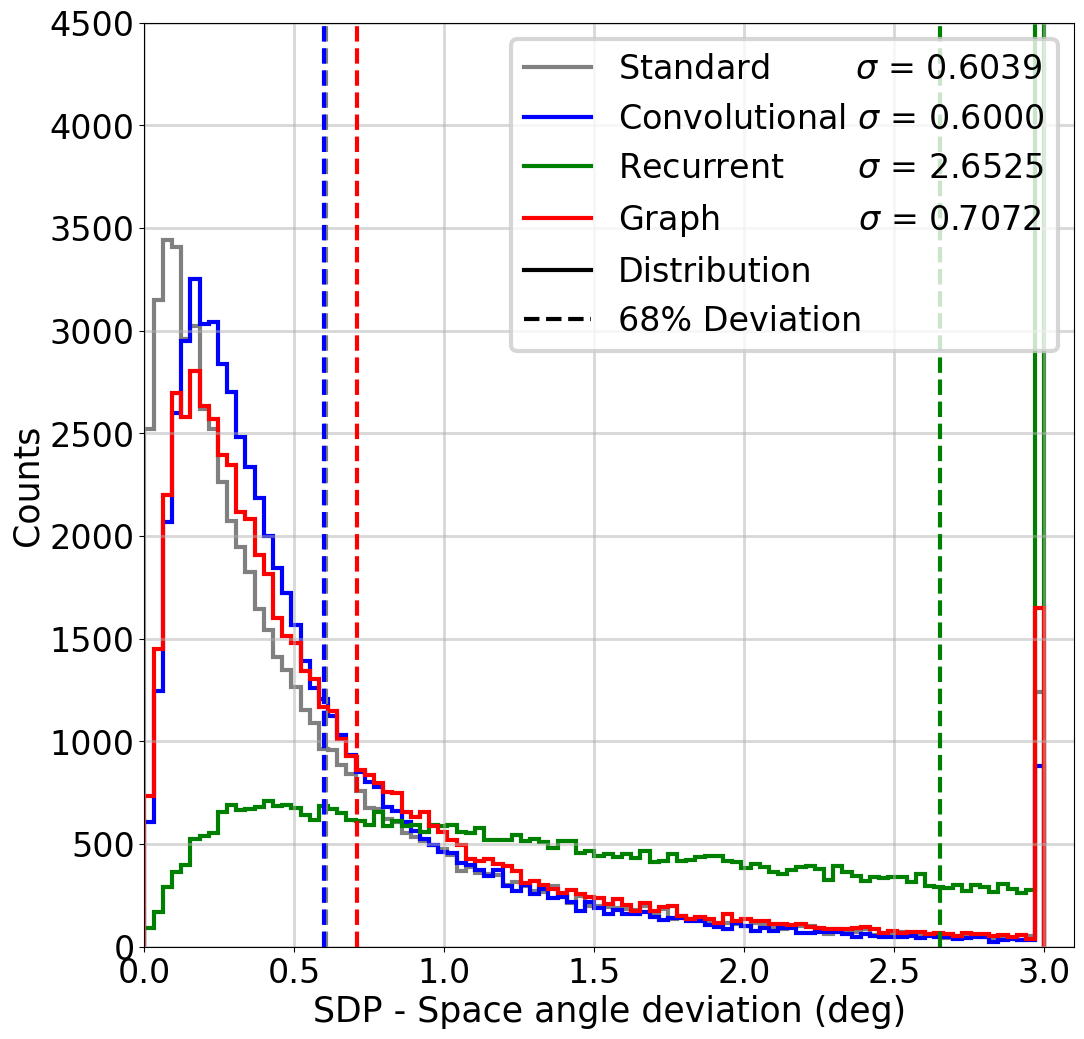

In [68]:
plt.style.use('default')
plt.style.use('AngularDeviation.mplstyle')

# Plotting the angular deviation for the SDP
plt.figure()
plt.stairs(  Rec_SDP_AngDiv_counts,  Rec_SDP_AngDiv_bin_edges, label='Rec'  , color=colors['Rec']  )
plt.stairs( Conv_SDP_AngDiv_counts, Conv_SDP_AngDiv_bin_edges, label='Conv' , color=colors['Conv'] )
plt.stairs( Recc_SDP_AngDiv_counts, Recc_SDP_AngDiv_bin_edges, label='Recc' , color=colors['Recc'] )
plt.stairs(Graph_SDP_AngDiv_counts,Graph_SDP_AngDiv_bin_edges,label='Graph' , color=colors['Graph'])

# Plotting the 68% deviation
plt.axvline(  Rec_SDP_AngDiv_sigma, color=colors['Rec'  ],linestyle='--')
plt.axvline( Conv_SDP_AngDiv_sigma, color=colors['Conv' ],linestyle='--')
plt.axvline( Recc_SDP_AngDiv_sigma, color=colors['Recc' ],linestyle='--')
plt.axvline(Graph_SDP_AngDiv_sigma, color=colors['Graph'],linestyle='--')

custom_lines = [Line2D([0], [0], color=colors['Rec']  ),
                Line2D([0], [0], color=colors['Conv'] ),
                Line2D([0], [0], color=colors['Recc'] ),
                Line2D([0], [0], color=colors['Graph']),
                Line2D([0], [0], color='black', linestyle='-'),
                Line2D([0], [0], color='black', linestyle='--')]

custom_labels = [f'Standard        $\sigma$ = {    Rec_SDP_AngDiv_sigma:.4f}',
                 f'Convolutional $\sigma$ = {     Conv_SDP_AngDiv_sigma:.4f}',
                 f'Recurrent       $\sigma$ = {   Recc_SDP_AngDiv_sigma:.4f}',
                 f'Graph             $\sigma$ = {Graph_SDP_AngDiv_sigma:.4f}',
                  'Distribution','68% Deviation']

plt.legend(custom_lines, custom_labels)#,bbox_to_anchor=(0.95, 1))
plt.xlabel('SDP - Space angle deviation (deg)')
plt.ylabel('Counts')
plt.ylim(0,4500)
plt.xlim(0,3.1)
plt.title('Angular Deviation Distribution for SDP')
plt.savefig('SDPDistribution.pdf')


In [ ]:
if len (Rec_SDP_AngDiv_counts) > 66:
    Rec_SDP_AngDiv_bin_edges   =   Rec_SDP_AngDiv_bin_edges[:67]
    Conv_SDP_AngDiv_bin_edges  =  Conv_SDP_AngDiv_bin_edges[:67]
    Recc_SDP_AngDiv_bin_edges  =  Recc_SDP_AngDiv_bin_edges[:67]
    Graph_SDP_AngDiv_bin_edges = Graph_SDP_AngDiv_bin_edges[:67]

    Rec_SDP_AngDiv_counts[65]   += np.sum(  Rec_SDP_AngDiv_counts[66:])
    Conv_SDP_AngDiv_counts[65]  += np.sum( Conv_SDP_AngDiv_counts[66:])
    Recc_SDP_AngDiv_counts[65]  += np.sum( Recc_SDP_AngDiv_counts[66:])
    Graph_SDP_AngDiv_counts[65] += np.sum(Graph_SDP_AngDiv_counts[66:])

    Rec_SDP_AngDiv_counts   =   Rec_SDP_AngDiv_counts[:66]
    Conv_SDP_AngDiv_counts  =  Conv_SDP_AngDiv_counts[:66]
    Recc_SDP_AngDiv_counts  =  Recc_SDP_AngDiv_counts[:66]
    Graph_SDP_AngDiv_counts = Graph_SDP_AngDiv_counts[:66]
    print('Size of the overflow bin')
    print('Rec:',Rec_SDP_AngDiv_counts[-1])
    print('Conv:',Conv_SDP_AngDiv_counts[-1])
    print('Recc:',Recc_SDP_AngDiv_counts[-1])
    print('Graph:',Graph_SDP_AngDiv_counts[-1])
else:
    print('Already adjusted')



Size of the overflow bin
Rec: 3444
Conv: 2703
Recc: 27386
Graph: 4216


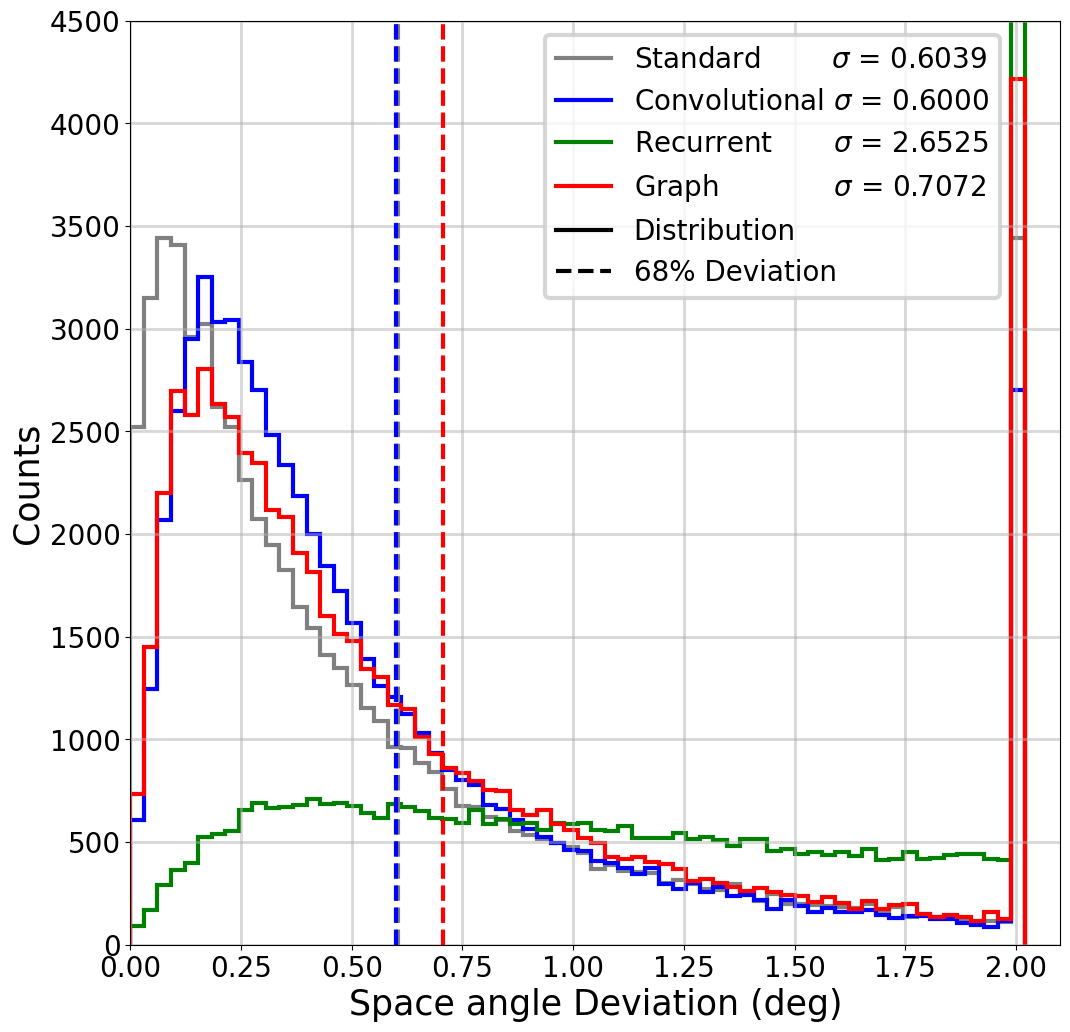

In [ ]:
# plt.style.use('default')
plt.style.use('AngularDeviation.mplstyle')

# Plotting the angular deviation for the SDP
plt.figure()
plt.stairs(  Rec_SDP_AngDiv_counts,  Rec_SDP_AngDiv_bin_edges, label='Rec'  , color=colors['Rec']  )
plt.stairs( Conv_SDP_AngDiv_counts, Conv_SDP_AngDiv_bin_edges, label='Conv' , color=colors['Conv'] )
plt.stairs( Recc_SDP_AngDiv_counts, Recc_SDP_AngDiv_bin_edges, label='Recc' , color=colors['Recc'] )
plt.stairs(Graph_SDP_AngDiv_counts,Graph_SDP_AngDiv_bin_edges,label='Graph' , color=colors['Graph'])

# Plotting the 68% deviation
plt.axvline(  Rec_SDP_AngDiv_sigma, color=colors['Rec'  ],linestyle='--')
plt.axvline( Conv_SDP_AngDiv_sigma, color=colors['Conv' ],linestyle='--')
plt.axvline( Recc_SDP_AngDiv_sigma, color=colors['Recc' ],linestyle='--')
plt.axvline(Graph_SDP_AngDiv_sigma, color=colors['Graph'],linestyle='--')

custom_lines = [Line2D([0], [0], color=colors['Rec']  ),
                Line2D([0], [0], color=colors['Conv'] ),
                Line2D([0], [0], color=colors['Recc'] ),
                Line2D([0], [0], color=colors['Graph']),
                Line2D([0], [0], color='black', linestyle='-'),
                Line2D([0], [0], color='black', linestyle='--')]

custom_labels = [f'Standard        $\sigma$ = {    Rec_SDP_AngDiv_sigma:.4f}',
                 f'Convolutional $\sigma$ = {     Conv_SDP_AngDiv_sigma:.4f}',
                 f'Recurrent       $\sigma$ = {   Recc_SDP_AngDiv_sigma:.4f}',
                 f'Graph             $\sigma$ = {Graph_SDP_AngDiv_sigma:.4f}',
                  'Distribution','68% Deviation']

plt.legend(custom_lines, custom_labels,bbox_to_anchor=(0.95, 1))
plt.xlabel('Space angle Deviation (deg)')
plt.ylabel('Counts')
plt.ylim(0,4500)
plt.xlim(0,2.1)
plt.savefig('SDPDistribution.pdf')

# Axis Angular deviation plots

Same deal as above, pretty much using the same code, except in the RecombineAxis files

Here is the code to produce the Axis Deviation values

In [ ]:
try: # Now we can combine the XYZ into a single plot to make angular deviation
    if 'x' in Truth_Keys and 'y' in Truth_Keys and 'z' in Truth_Keys:
        # Normalize the vectors to unit vectors
        def normalize_vectors(vectors):
            norms = np.linalg.norm(vectors, axis=1)
            return vectors / norms[:, np.newaxis]

        # Compute the angular deviation
        def compute_angular_deviation(truth, pred, rec):
            truth = normalize_vectors(truth)
            pred = normalize_vectors(pred)
            rec = normalize_vectors(rec)
            

            pred_dot_product = np.einsum('ij,ij->i', truth, pred)
            rec_dot_product = np.einsum('ij,ij->i', truth, rec)
            
            pred_ang_div = np.arccos(np.clip(pred_dot_product, -1.0, 1.0))
            rec_ang_div = np.arccos(np.clip(rec_dot_product, -1.0, 1.0))

            return pred_ang_div, rec_ang_div
        
        AngDivPred, AngDivRec = compute_angular_deviation(Truth[:, Truth_Keys.index('x'):Truth_Keys.index('z')+1], Pred[:, Truth_Keys.index('x'):Truth_Keys.index('z')+1], Rec[:, Truth_Keys.index('x'):Truth_Keys.index('z')+1])

        AngDivPred = np.rad2deg(AngDivPred)
        AngDivRec = np.rad2deg(AngDivRec)

        nbins = 100
        Range = (0,4.5)
        bins = np.concatenate([np.linspace(Range[0], Range[1], nbins-1), [np.inf]])

        plt.figure(figsize = (10,10))
    
        counts,bin_edges = np.histogram(AngDivPred,bins=bins)
        print('Model Values')
        print('Counts',counts.tolist())
        print('Bin Edges',bin_edges.tolist())
        counts[-2] += counts[-1]
        bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
        plt.bar(bin_centers[:-1], counts[:-1], width=np.diff(bin_edges[:-1]), align="edge", label='Model')

        counts,bin_edges = np.histogram(AngDivRec,bins=bins)
        print('Reconstruction Values')
        print('Counts',counts.tolist())
        print('Bin Edges',bin_edges.tolist())
        counts[-2] += counts[-1]
        bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
        plt.bar(bin_centers[:-1], counts[:-1], width=np.diff(bin_edges[:-1]), align="edge", label='Reconstruction',alpha = 0.5)

        # Plot hlines for the 68%
        plt.axvline(np.percentile(AngDivRec  ,68), color='dodgerblue', linestyle='--',label = 'Reconstruction 68%')
        plt.axvline(np.percentile(AngDivPred ,68), color='firebrick' , linestyle='--',label = 'Model 68%')

        print('Sigma Pred:',np.percentile(AngDivPred,68))
        print('Sigma Rec:' ,np.percentile(AngDivRec ,68))
        
        plt.xlabel('Angular Deviation (deg)')
        plt.ylabel('Counts')
        plt.legend()
        plt.grid()
        plt.show()
except:
    pass

In [ ]:
# Load the data (if any prints are false, this is bad)
Rec_Axis_AngDiv_counts      = np.array([959, 2737, 4178, 5307, 5635, 5207, 4390, 3828, 3178, 2720, 2327, 2112, 1740, 1562, 1334, 1241, 1110, 919, 866, 837, 685, 680, 606, 500, 510, 460, 432, 382, 399, 318, 271, 262, 250, 251, 239, 202, 201, 168, 177, 145, 142, 121, 132, 110, 117, 106, 92, 78, 97, 74, 80, 73, 57, 67, 51, 66, 55, 63, 41, 35, 37, 45, 38, 31, 23, 19, 27, 23, 24, 23, 17, 20, 25, 16, 16, 14, 18, 16, 13, 13, 10, 11, 8, 6, 7, 11, 10, 5, 11, 2, 4, 5, 5, 3, 4, 3, 3, 2, 70])
Rec_Axis_AngDiv_bin_edges   = np.array([0.0, 0.061224489795918366, 0.12244897959183673, 0.18367346938775508, 0.24489795918367346, 0.30612244897959184, 0.36734693877551017, 0.42857142857142855, 0.4897959183673469, 0.5510204081632653, 0.6122448979591837, 0.673469387755102, 0.7346938775510203, 0.7959183673469388, 0.8571428571428571, 0.9183673469387755, 0.9795918367346939, 1.0408163265306123, 1.1020408163265305, 1.163265306122449, 1.2244897959183674, 1.2857142857142856, 1.346938775510204, 1.4081632653061225, 1.4693877551020407, 1.530612244897959, 1.5918367346938775, 1.653061224489796, 1.7142857142857142, 1.7755102040816326, 1.836734693877551, 1.8979591836734693, 1.9591836734693877, 2.020408163265306, 2.0816326530612246, 2.142857142857143, 2.204081632653061, 2.2653061224489797, 2.326530612244898, 2.387755102040816, 2.4489795918367347, 2.510204081632653, 2.571428571428571, 2.63265306122449, 2.693877551020408, 2.7551020408163263, 2.816326530612245, 2.877551020408163, 2.9387755102040813, 3.0, 3.061224489795918, 3.122448979591837, 3.183673469387755, 3.2448979591836733, 3.306122448979592, 3.36734693877551, 3.4285714285714284, 3.489795918367347, 3.5510204081632653, 3.6122448979591835, 3.673469387755102, 3.7346938775510203, 3.7959183673469385, 3.857142857142857, 3.9183673469387754, 3.9795918367346936, 4.040816326530612, 4.1020408163265305, 4.163265306122449, 4.224489795918367, 4.285714285714286, 4.346938775510204, 4.408163265306122, 4.469387755102041, 4.530612244897959, 4.591836734693877, 4.653061224489796, 4.714285714285714, 4.775510204081632, 4.836734693877551, 4.8979591836734695, 4.959183673469387, 5.020408163265306, 5.081632653061225, 5.142857142857142, 5.204081632653061, 5.26530612244898, 5.326530612244897, 5.387755102040816, 5.448979591836735, 5.5102040816326525, 5.571428571428571, 5.63265306122449, 5.693877551020408, 5.755102040816326, 5.816326530612245, 5.877551020408163, 5.938775510204081, 6.0])
Rec_Axis_AngDiv_sigma       = 0.7146373987197876

Conv_Axis_AngDiv_counts     = np.array([120, 469, 742, 1014, 1221, 1395, 1563, 1776, 1863, 1835, 1848, 1830, 1906, 1913, 1871, 1890, 1808, 1665, 1669, 1656, 1569, 1538, 1468, 1347, 1363, 1319, 1253, 1175, 1113, 1066, 1064, 950, 894, 852, 833, 732, 729, 752, 658, 632, 588, 592, 519, 470, 492, 445, 415, 393, 358, 360, 320, 326, 263, 258, 258, 238, 221, 198, 225, 182, 186, 176, 148, 132, 133, 147, 124, 105, 114, 105, 93, 75, 86, 77, 93, 69, 64, 65, 53, 47, 60, 51, 43, 55, 48, 46, 41, 44, 24, 27, 32, 31, 23, 27, 19, 24, 21, 17, 413])
Conv_Axis_AngDiv_bin_edges  = np.array([0.0, 0.061224489795918366, 0.12244897959183673, 0.18367346938775508, 0.24489795918367346, 0.30612244897959184, 0.36734693877551017, 0.42857142857142855, 0.4897959183673469, 0.5510204081632653, 0.6122448979591837, 0.673469387755102, 0.7346938775510203, 0.7959183673469388, 0.8571428571428571, 0.9183673469387755, 0.9795918367346939, 1.0408163265306123, 1.1020408163265305, 1.163265306122449, 1.2244897959183674, 1.2857142857142856, 1.346938775510204, 1.4081632653061225, 1.4693877551020407, 1.530612244897959, 1.5918367346938775, 1.653061224489796, 1.7142857142857142, 1.7755102040816326, 1.836734693877551, 1.8979591836734693, 1.9591836734693877, 2.020408163265306, 2.0816326530612246, 2.142857142857143, 2.204081632653061, 2.2653061224489797, 2.326530612244898, 2.387755102040816, 2.4489795918367347, 2.510204081632653, 2.571428571428571, 2.63265306122449, 2.693877551020408, 2.7551020408163263, 2.816326530612245, 2.877551020408163, 2.9387755102040813, 3.0, 3.061224489795918, 3.122448979591837, 3.183673469387755, 3.2448979591836733, 3.306122448979592, 3.36734693877551, 3.4285714285714284, 3.489795918367347, 3.5510204081632653, 3.6122448979591835, 3.673469387755102, 3.7346938775510203, 3.7959183673469385, 3.857142857142857, 3.9183673469387754, 3.9795918367346936, 4.040816326530612, 4.1020408163265305, 4.163265306122449, 4.224489795918367, 4.285714285714286, 4.346938775510204, 4.408163265306122, 4.469387755102041, 4.530612244897959, 4.591836734693877, 4.653061224489796, 4.714285714285714, 4.775510204081632, 4.836734693877551, 4.8979591836734695, 4.959183673469387, 5.020408163265306, 5.081632653061225, 5.142857142857142, 5.204081632653061, 5.26530612244898, 5.326530612244897, 5.387755102040816, 5.448979591836735, 5.5102040816326525, 5.571428571428571, 5.63265306122449, 5.693877551020408, 5.755102040816326, 5.816326530612245, 5.877551020408163, 5.938775510204081, 6.0])
Conv_Axis_AngDiv_sigma      = 1.7581392526626587

Recc_Axis_AngDiv_counts     = np.array([8, 34, 46, 74, 99, 83, 119, 159, 175, 174, 195, 205, 208, 229, 236, 276, 275, 323, 306, 323, 348, 358, 366, 366, 380, 398, 375, 426, 437, 461, 462, 459, 441, 483, 468, 520, 488, 507, 560, 471, 524, 505, 513, 523, 520, 512, 537, 558, 545, 539, 524, 567, 537, 554, 566, 552, 546, 557, 525, 513, 551, 528, 515, 509, 556, 516, 517, 530, 510, 475, 514, 498, 499, 489, 539, 483, 517, 549, 502, 521, 494, 488, 492, 467, 449, 496, 483, 441, 467, 424, 446, 413, 353, 435, 391, 402, 394, 370, 20359])
Recc_Axis_AngDiv_bin_edges  = np.array([0.0, 0.061224489795918366, 0.12244897959183673, 0.18367346938775508, 0.24489795918367346, 0.30612244897959184, 0.36734693877551017, 0.42857142857142855, 0.4897959183673469, 0.5510204081632653, 0.6122448979591837, 0.673469387755102, 0.7346938775510203, 0.7959183673469388, 0.8571428571428571, 0.9183673469387755, 0.9795918367346939, 1.0408163265306123, 1.1020408163265305, 1.163265306122449, 1.2244897959183674, 1.2857142857142856, 1.346938775510204, 1.4081632653061225, 1.4693877551020407, 1.530612244897959, 1.5918367346938775, 1.653061224489796, 1.7142857142857142, 1.7755102040816326, 1.836734693877551, 1.8979591836734693, 1.9591836734693877, 2.020408163265306, 2.0816326530612246, 2.142857142857143, 2.204081632653061, 2.2653061224489797, 2.326530612244898, 2.387755102040816, 2.4489795918367347, 2.510204081632653, 2.571428571428571, 2.63265306122449, 2.693877551020408, 2.7551020408163263, 2.816326530612245, 2.877551020408163, 2.9387755102040813, 3.0, 3.061224489795918, 3.122448979591837, 3.183673469387755, 3.2448979591836733, 3.306122448979592, 3.36734693877551, 3.4285714285714284, 3.489795918367347, 3.5510204081632653, 3.6122448979591835, 3.673469387755102, 3.7346938775510203, 3.7959183673469385, 3.857142857142857, 3.9183673469387754, 3.9795918367346936, 4.040816326530612, 4.1020408163265305, 4.163265306122449, 4.224489795918367, 4.285714285714286, 4.346938775510204, 4.408163265306122, 4.469387755102041, 4.530612244897959, 4.591836734693877, 4.653061224489796, 4.714285714285714, 4.775510204081632, 4.836734693877551, 4.8979591836734695, 4.959183673469387, 5.020408163265306, 5.081632653061225, 5.142857142857142, 5.204081632653061, 5.26530612244898, 5.326530612244897, 5.387755102040816, 5.448979591836735, 5.5102040816326525, 5.571428571428571, 5.63265306122449, 5.693877551020408, 5.755102040816326, 5.816326530612245, 5.877551020408163, 5.938775510204081, 6.0])
Recc_Axis_AngDiv_sigma      = 6.099489917755128

Graph_Axis_AngDiv_counts    = np.array([101, 314, 505, 636, 797, 964, 1026, 1168, 1212, 1163, 1276, 1224, 1304, 1342, 1272, 1247, 1269, 1173, 1188, 1133, 1165, 1111, 1144, 1053, 1077, 1006, 1066, 992, 959, 927, 878, 844, 840, 810, 788, 779, 811, 709, 706, 725, 709, 640, 637, 608, 591, 566, 552, 532, 538, 513, 487, 490, 431, 434, 450, 425, 413, 428, 392, 371, 363, 343, 358, 359, 343, 291, 273, 262, 290, 246, 282, 289, 249, 261, 234, 249, 220, 225, 202, 206, 187, 193, 187, 158, 181, 178, 166, 164, 134, 158, 160, 144, 144, 125, 118, 136, 124, 126, 4381])
Graph_Axis_AngDiv_bin_edges = np.array([0.0, 0.061224489795918366, 0.12244897959183673, 0.18367346938775508, 0.24489795918367346, 0.30612244897959184, 0.36734693877551017, 0.42857142857142855, 0.4897959183673469, 0.5510204081632653, 0.6122448979591837, 0.673469387755102, 0.7346938775510203, 0.7959183673469388, 0.8571428571428571, 0.9183673469387755, 0.9795918367346939, 1.0408163265306123, 1.1020408163265305, 1.163265306122449, 1.2244897959183674, 1.2857142857142856, 1.346938775510204, 1.4081632653061225, 1.4693877551020407, 1.530612244897959, 1.5918367346938775, 1.653061224489796, 1.7142857142857142, 1.7755102040816326, 1.836734693877551, 1.8979591836734693, 1.9591836734693877, 2.020408163265306, 2.0816326530612246, 2.142857142857143, 2.204081632653061, 2.2653061224489797, 2.326530612244898, 2.387755102040816, 2.4489795918367347, 2.510204081632653, 2.571428571428571, 2.63265306122449, 2.693877551020408, 2.7551020408163263, 2.816326530612245, 2.877551020408163, 2.9387755102040813, 3.0, 3.061224489795918, 3.122448979591837, 3.183673469387755, 3.2448979591836733, 3.306122448979592, 3.36734693877551, 3.4285714285714284, 3.489795918367347, 3.5510204081632653, 3.6122448979591835, 3.673469387755102, 3.7346938775510203, 3.7959183673469385, 3.857142857142857, 3.9183673469387754, 3.9795918367346936, 4.040816326530612, 4.1020408163265305, 4.163265306122449, 4.224489795918367, 4.285714285714286, 4.346938775510204, 4.408163265306122, 4.469387755102041, 4.530612244897959, 4.591836734693877, 4.653061224489796, 4.714285714285714, 4.775510204081632, 4.836734693877551, 4.8979591836734695, 4.959183673469387, 5.020408163265306, 5.081632653061225, 5.142857142857142, 5.204081632653061, 5.26530612244898, 5.326530612244897, 5.387755102040816, 5.448979591836735, 5.5102040816326525, 5.571428571428571, 5.63265306122449, 5.693877551020408, 5.755102040816326, 5.816326530612245, 5.877551020408163, 5.938775510204081, 6.0])
Graph_Axis_AngDiv_sigma     = 2.7563369274139404


# Compute the overflow bin
Rec_Axis_AngDiv_counts [-2] += Rec_Axis_AngDiv_counts [-1]
Conv_Axis_AngDiv_counts[-2] += Conv_Axis_AngDiv_counts[-1]
Recc_Axis_AngDiv_counts[-2] += Recc_Axis_AngDiv_counts[-1]
Graph_Axis_AngDiv_counts[-2]+= Graph_Axis_AngDiv_counts[-1]
Rec_Axis_AngDiv_counts   = Rec_Axis_AngDiv_counts [:-1]
Conv_Axis_AngDiv_counts  = Conv_Axis_AngDiv_counts[:-1]
Recc_Axis_AngDiv_counts  = Recc_Axis_AngDiv_counts[:-1]
Graph_Axis_AngDiv_counts = Graph_Axis_AngDiv_counts[:-1]


# Confirm the bin_edges are the same
print(np.all(Rec_Axis_AngDiv_bin_edges ==  Conv_Axis_AngDiv_bin_edges))
print(np.all(Rec_Axis_AngDiv_bin_edges ==  Recc_Axis_AngDiv_bin_edges))
print(np.all(Rec_Axis_AngDiv_bin_edges == Graph_Axis_AngDiv_bin_edges))


True
True
True


In [ ]:
# Check total counts
print(f'Total Counts Rec: {  np.sum(  Rec_SDP_AngDiv_counts)}')
print(f'Total Counts Conv: { np.sum( Conv_SDP_AngDiv_counts)}')
print(f'Total Counts Recc: { np.sum( Recc_SDP_AngDiv_counts)}')
print(f'Total Counts Graph: {np.sum(Graph_SDP_AngDiv_counts)}')


Total Counts Rec: 61620
Total Counts Conv: 61620
Total Counts Recc: 61620
Total Counts Graph: 61620


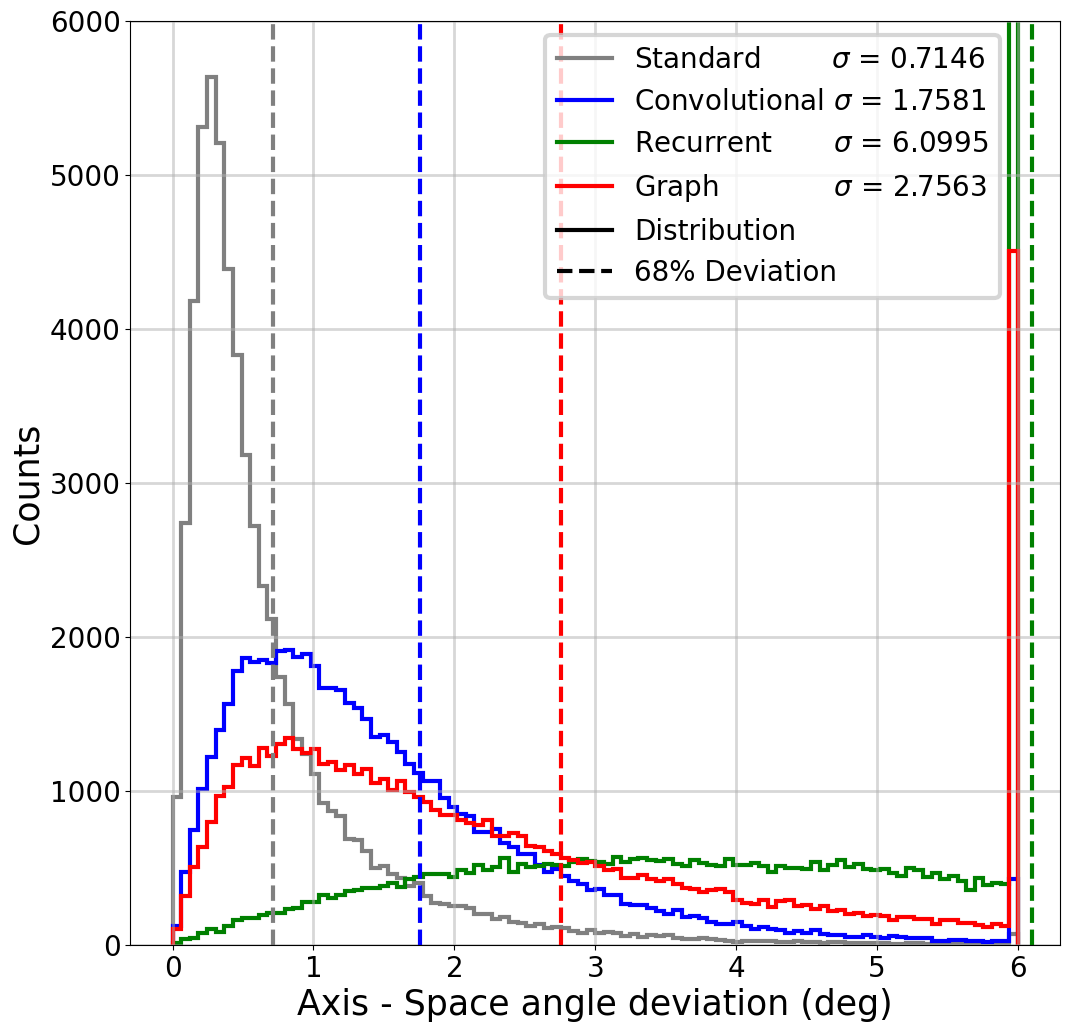

In [ ]:
# plt.style.use('default')
plt.style.use('AngularDeviation.mplstyle')

# Plotting the angular deviation for the SDP
plt.figure()
plt.stairs(  Rec_Axis_AngDiv_counts,  Rec_Axis_AngDiv_bin_edges, label='Rec'  , color=colors['Rec']  )
plt.stairs( Conv_Axis_AngDiv_counts, Conv_Axis_AngDiv_bin_edges, label='Conv' , color=colors['Conv'] )
plt.stairs( Recc_Axis_AngDiv_counts, Recc_Axis_AngDiv_bin_edges, label='Recc' , color=colors['Recc'] )
plt.stairs(Graph_Axis_AngDiv_counts,Graph_Axis_AngDiv_bin_edges,label='Graph' , color=colors['Graph'])

# Plotting the 68% deviation
plt.axvline(  Rec_Axis_AngDiv_sigma, color=colors['Rec'  ],linestyle='--')
plt.axvline( Conv_Axis_AngDiv_sigma, color=colors['Conv' ],linestyle='--')
plt.axvline( Recc_Axis_AngDiv_sigma, color=colors['Recc' ],linestyle='--')
plt.axvline(Graph_Axis_AngDiv_sigma, color=colors['Graph'],linestyle='--')

custom_lines = [Line2D([0], [0], color=colors['Rec']  ),
                Line2D([0], [0], color=colors['Conv'] ),
                Line2D([0], [0], color=colors['Recc'] ),
                Line2D([0], [0], color=colors['Graph']),
                Line2D([0], [0], color='black', linestyle='-'),
                Line2D([0], [0], color='black', linestyle='--')]

custom_labels = [f'Standard        $\sigma$ = {    Rec_Axis_AngDiv_sigma:.4f}',
                 f'Convolutional $\sigma$ = {     Conv_Axis_AngDiv_sigma:.4f}',
                 f'Recurrent       $\sigma$ = {   Recc_Axis_AngDiv_sigma:.4f}',
                 f'Graph             $\sigma$ = {Graph_Axis_AngDiv_sigma:.4f}',
                  'Distribution','68% Deviation']

plt.legend(custom_lines, custom_labels,bbox_to_anchor=(0.95, 1))
plt.xlabel('Axis - Space angle deviation (deg)')
plt.ylabel('Counts')
plt.ylim(0,6000)
# plt.xlim(0,3.1)
plt.savefig('AxisDistribution.pdf')

# Core - Eye Distance Deviation plots

Yep

In [ ]:
try:# Easy Stuff First - CEDist

    if 'CEDist'in TruthKeys:
    
        plt.figure(figsize=(15,15))
        X  = Truth[:, TruthKeys.index('CEDist')]
        Yp = Pred [:, TruthKeys.index('CEDist')]
        Yr = Rec  [:, TruthKeys.index('CEDist')]

        E_p = np.abs(Yp-X)
        E_r = np.abs(Yr-X)

        # Make cut on 99% of the Pred Data (assuming its larger than the Rec Data)
        cut = np.percentile(E_p,99)
        cut = E_p<cut

        E_p = E_p[cut]
        E_r = E_r[cut]
        if TruthUnits[TruthKeys.index('CEDist')] == 'km':
            E_p = E_p*1000
            E_r = E_r*1000

        nbins = 100
        Range = (0,1000) 
        bins = np.concatenate([np.linspace(Range[0], Range[1], nbins-1), [np.inf]])
        
        plt.figure(figsize = (10,10))
        counts,bin_edges = np.histogram(E_p,bins=bins)
        print('Model Values')
        print('Counts',counts.tolist())
        print('Bin Edges',bin_edges.tolist())
        counts[-2] += counts[-1]
        bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
        plt.bar(bin_centers[:-1], counts[:-1], width=np.diff(bin_edges[:-1]), align="edge", label='Model',color = 'firebrick')
        
        counts,bin_edges = np.histogram(E_r,bins=bins)
        print('Reconstruction Values')
        print('Counts',counts.tolist())
        print('Bin Edges',bin_edges.tolist())
        counts[-2] += counts[-1]
        bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
        plt.bar(bin_centers[:-1], counts[:-1], width=np.diff(bin_edges[:-1]), align="edge", label='Reconstruction',color = 'dodgerblue',alpha = 0.5)
        
        plt.axvline(np.percentile(E_p,68), color='firebrick' , linestyle='--',label = 'Model 68%')
        plt.axvline(np.percentile(E_r,68), color='dodgerblue', linestyle='--',label = 'Reconstruction 68%')
        # Print the 68% vlines
        print('Sigma Pred:',np.percentile(E_p,68))
        print('Sigma Rec:',np.percentile(E_r,68))

        plt.xlabel(f'CEDist Error (m)')
        plt.ylabel('Counts')
        plt.legend()
        plt.grid()
        plt.show()
except:
    pass

In [ ]:
# Load the data (if any prints are false, this is bad)
Rec_CEDist_Div_counts      = np.array([18235, 13192, 8331, 5376, 3683, 2529, 1941, 1357, 1089, 872, 694, 511, 420, 352, 291, 273, 217, 192, 172, 109, 129, 106, 87, 82, 67, 61, 59, 40, 50, 38, 44, 24, 25, 35, 19, 18, 13, 21, 16, 19, 18, 16, 10, 12, 9, 4, 6, 7, 7, 8, 7, 10, 6, 5, 6, 4, 10, 5, 2, 4, 3, 1, 3, 5, 2, 1, 3, 0, 0, 2, 0, 2, 0, 2, 2, 3, 1, 2, 1, 0, 0, 1, 1, 1, 3, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 9])
Rec_CEDist_Div_bin_edges   = np.array([0.0, 10.204081632653061, 20.408163265306122, 30.612244897959183, 40.816326530612244, 51.0204081632653, 61.224489795918366, 71.42857142857143, 81.63265306122449, 91.83673469387755, 102.0408163265306, 112.24489795918367, 122.44897959183673, 132.6530612244898, 142.85714285714286, 153.0612244897959, 163.26530612244898, 173.46938775510205, 183.6734693877551, 193.87755102040816, 204.0816326530612, 214.28571428571428, 224.48979591836735, 234.6938775510204, 244.89795918367346, 255.10204081632654, 265.3061224489796, 275.51020408163265, 285.7142857142857, 295.9183673469388, 306.1224489795918, 316.3265306122449, 326.53061224489795, 336.734693877551, 346.9387755102041, 357.1428571428571, 367.3469387755102, 377.55102040816325, 387.7551020408163, 397.9591836734694, 408.1632653061224, 418.3673469387755, 428.57142857142856, 438.7755102040816, 448.9795918367347, 459.18367346938777, 469.3877551020408, 479.59183673469386, 489.7959183673469, 500.0, 510.2040816326531, 520.4081632653061, 530.6122448979592, 540.8163265306123, 551.0204081632653, 561.2244897959183, 571.4285714285714, 581.6326530612245, 591.8367346938776, 602.0408163265306, 612.2448979591836, 622.4489795918367, 632.6530612244898, 642.8571428571429, 653.0612244897959, 663.2653061224489, 673.469387755102, 683.6734693877551, 693.8775510204082, 704.0816326530612, 714.2857142857142, 724.4897959183673, 734.6938775510204, 744.8979591836735, 755.1020408163265, 765.3061224489795, 775.5102040816327, 785.7142857142857, 795.9183673469388, 806.1224489795918, 816.3265306122448, 826.530612244898, 836.734693877551, 846.9387755102041, 857.1428571428571, 867.3469387755102, 877.5510204081633, 887.7551020408163, 897.9591836734694, 908.1632653061224, 918.3673469387755, 928.5714285714286, 938.7755102040816, 948.9795918367347, 959.1836734693877, 969.3877551020408, 979.5918367346939, 989.7959183673469, 1000.0])
Rec_CEDist_Div_sigma       = 33.54537963867188

Conv_CEDist_Div_counts     = np.array([1358, 1427, 1404, 1345, 1358, 1429, 1353, 1332, 1353, 1330, 1400, 1375, 1329, 1351, 1251, 1233, 1322, 1219, 1214, 1227, 1213, 1167, 1100, 1156, 1160, 1054, 1092, 1030, 1068, 981, 1010, 984, 931, 938, 913, 917, 882, 827, 749, 780, 763, 729, 708, 651, 684, 615, 589, 621, 525, 535, 496, 463, 444, 477, 456, 426, 382, 373, 347, 335, 291, 300, 297, 272, 260, 204, 209, 192, 170, 174, 196, 150, 156, 133, 123, 100, 98, 96, 75, 95, 64, 63, 64, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Conv_CEDist_Div_bin_edges  = np.array([0.0, 10.204081632653061, 20.408163265306122, 30.612244897959183, 40.816326530612244, 51.0204081632653, 61.224489795918366, 71.42857142857143, 81.63265306122449, 91.83673469387755, 102.0408163265306, 112.24489795918367, 122.44897959183673, 132.6530612244898, 142.85714285714286, 153.0612244897959, 163.26530612244898, 173.46938775510205, 183.6734693877551, 193.87755102040816, 204.0816326530612, 214.28571428571428, 224.48979591836735, 234.6938775510204, 244.89795918367346, 255.10204081632654, 265.3061224489796, 275.51020408163265, 285.7142857142857, 295.9183673469388, 306.1224489795918, 316.3265306122449, 326.53061224489795, 336.734693877551, 346.9387755102041, 357.1428571428571, 367.3469387755102, 377.55102040816325, 387.7551020408163, 397.9591836734694, 408.1632653061224, 418.3673469387755, 428.57142857142856, 438.7755102040816, 448.9795918367347, 459.18367346938777, 469.3877551020408, 479.59183673469386, 489.7959183673469, 500.0, 510.2040816326531, 520.4081632653061, 530.6122448979592, 540.8163265306123, 551.0204081632653, 561.2244897959183, 571.4285714285714, 581.6326530612245, 591.8367346938776, 602.0408163265306, 612.2448979591836, 622.4489795918367, 632.6530612244898, 642.8571428571429, 653.0612244897959, 663.2653061224489, 673.469387755102, 683.6734693877551, 693.8775510204082, 704.0816326530612, 714.2857142857142, 724.4897959183673, 734.6938775510204, 744.8979591836735, 755.1020408163265, 765.3061224489795, 775.5102040816327, 785.7142857142857, 795.9183673469388, 806.1224489795918, 816.3265306122448, 826.530612244898, 836.734693877551, 846.9387755102041, 857.1428571428571, 867.3469387755102, 877.5510204081633, 887.7551020408163, 897.9591836734694, 908.1632653061224, 918.3673469387755, 928.5714285714286, 938.7755102040816, 948.9795918367347, 959.1836734693877, 969.3877551020408, 979.5918367346939, 989.7959183673469, 1000.0])
Conv_CEDist_Div_sigma      = 346.817109375

Recc_CEDist_Div_counts     = np.array([690, 695, 712, 728, 736, 689, 715, 711, 681, 752, 695, 716, 744, 728, 705, 666, 722, 662, 654, 732, 691, 664, 706, 675, 677, 690, 643, 654, 663, 624, 651, 669, 620, 619, 649, 621, 602, 658, 584, 634, 588, 612, 624, 585, 597, 531, 545, 570, 509, 536, 505, 507, 486, 526, 494, 512, 493, 480, 478, 426, 474, 443, 435, 439, 423, 391, 441, 406, 399, 397, 391, 365, 360, 407, 376, 355, 368, 347, 339, 334, 334, 353, 336, 323, 297, 295, 307, 269, 273, 263, 268, 270, 273, 266, 241, 237, 240, 248, 10289])
Recc_CEDist_Div_bin_edges  = np.array([0.0, 10.204081632653061, 20.408163265306122, 30.612244897959183, 40.816326530612244, 51.0204081632653, 61.224489795918366, 71.42857142857143, 81.63265306122449, 91.83673469387755, 102.0408163265306, 112.24489795918367, 122.44897959183673, 132.6530612244898, 142.85714285714286, 153.0612244897959, 163.26530612244898, 173.46938775510205, 183.6734693877551, 193.87755102040816, 204.0816326530612, 214.28571428571428, 224.48979591836735, 234.6938775510204, 244.89795918367346, 255.10204081632654, 265.3061224489796, 275.51020408163265, 285.7142857142857, 295.9183673469388, 306.1224489795918, 316.3265306122449, 326.53061224489795, 336.734693877551, 346.9387755102041, 357.1428571428571, 367.3469387755102, 377.55102040816325, 387.7551020408163, 397.9591836734694, 408.1632653061224, 418.3673469387755, 428.57142857142856, 438.7755102040816, 448.9795918367347, 459.18367346938777, 469.3877551020408, 479.59183673469386, 489.7959183673469, 500.0, 510.2040816326531, 520.4081632653061, 530.6122448979592, 540.8163265306123, 551.0204081632653, 561.2244897959183, 571.4285714285714, 581.6326530612245, 591.8367346938776, 602.0408163265306, 612.2448979591836, 622.4489795918367, 632.6530612244898, 642.8571428571429, 653.0612244897959, 663.2653061224489, 673.469387755102, 683.6734693877551, 693.8775510204082, 704.0816326530612, 714.2857142857142, 724.4897959183673, 734.6938775510204, 744.8979591836735, 755.1020408163265, 765.3061224489795, 775.5102040816327, 785.7142857142857, 795.9183673469388, 806.1224489795918, 816.3265306122448, 826.530612244898, 836.734693877551, 846.9387755102041, 857.1428571428571, 867.3469387755102, 877.5510204081633, 887.7551020408163, 897.9591836734694, 908.1632653061224, 918.3673469387755, 928.5714285714286, 938.7755102040816, 948.9795918367347, 959.1836734693877, 969.3877551020408, 979.5918367346939, 989.7959183673469, 1000.0])
Recc_CEDist_Div_sigma      = 701.4676098632813

Graph_CEDist_Div_counts    = np.array([729, 743, 694, 706, 746, 759, 694, 718, 726, 667, 680, 708, 718, 747, 719, 716, 722, 726, 643, 692, 664, 637, 680, 678, 649, 674, 651, 625, 624, 612, 597, 580, 602, 560, 601, 567, 576, 554, 561, 531, 556, 542, 576, 486, 527, 475, 523, 473, 495, 488, 466, 461, 437, 398, 437, 397, 435, 378, 401, 396, 394, 423, 383, 379, 392, 324, 343, 353, 329, 332, 306, 297, 315, 292, 295, 288, 290, 286, 272, 279, 277, 278, 269, 261, 267, 247, 265, 232, 261, 241, 217, 213, 201, 196, 204, 190, 166, 200, 14423])
Graph_CEDist_Div_bin_edges = np.array([0.0, 10.204081632653061, 20.408163265306122, 30.612244897959183, 40.816326530612244, 51.0204081632653, 61.224489795918366, 71.42857142857143, 81.63265306122449, 91.83673469387755, 102.0408163265306, 112.24489795918367, 122.44897959183673, 132.6530612244898, 142.85714285714286, 153.0612244897959, 163.26530612244898, 173.46938775510205, 183.6734693877551, 193.87755102040816, 204.0816326530612, 214.28571428571428, 224.48979591836735, 234.6938775510204, 244.89795918367346, 255.10204081632654, 265.3061224489796, 275.51020408163265, 285.7142857142857, 295.9183673469388, 306.1224489795918, 316.3265306122449, 326.53061224489795, 336.734693877551, 346.9387755102041, 357.1428571428571, 367.3469387755102, 377.55102040816325, 387.7551020408163, 397.9591836734694, 408.1632653061224, 418.3673469387755, 428.57142857142856, 438.7755102040816, 448.9795918367347, 459.18367346938777, 469.3877551020408, 479.59183673469386, 489.7959183673469, 500.0, 510.2040816326531, 520.4081632653061, 530.6122448979592, 540.8163265306123, 551.0204081632653, 561.2244897959183, 571.4285714285714, 581.6326530612245, 591.8367346938776, 602.0408163265306, 612.2448979591836, 622.4489795918367, 632.6530612244898, 642.8571428571429, 653.0612244897959, 663.2653061224489, 673.469387755102, 683.6734693877551, 693.8775510204082, 704.0816326530612, 714.2857142857142, 724.4897959183673, 734.6938775510204, 744.8979591836735, 755.1020408163265, 765.3061224489795, 775.5102040816327, 785.7142857142857, 795.9183673469388, 806.1224489795918, 816.3265306122448, 826.530612244898, 836.734693877551, 846.9387755102041, 857.1428571428571, 867.3469387755102, 877.5510204081633, 887.7551020408163, 897.9591836734694, 908.1632653061224, 918.3673469387755, 928.5714285714286, 938.7755102040816, 948.9795918367347, 959.1836734693877, 969.3877551020408, 979.5918367346939, 989.7959183673469, 1000.0])
Graph_CEDist_Div_sigma     = 782.7624609375001


# Compute the overflow bin
Rec_CEDist_Div_counts [-2] += Rec_CEDist_Div_counts [-1]
Conv_CEDist_Div_counts[-2] += Conv_CEDist_Div_counts[-1]
Recc_CEDist_Div_counts[-2] += Recc_CEDist_Div_counts[-1]
Graph_CEDist_Div_counts[-2]+= Graph_CEDist_Div_counts[-1]
Rec_CEDist_Div_counts   = Rec_CEDist_Div_counts [:-1]
Conv_CEDist_Div_counts  = Conv_CEDist_Div_counts[:-1]
Recc_CEDist_Div_counts  = Recc_CEDist_Div_counts[:-1]
Graph_CEDist_Div_counts = Graph_CEDist_Div_counts[:-1]


# Confirm the bin_edges are the same
print(np.all(Rec_CEDist_Div_bin_edges ==  Conv_CEDist_Div_bin_edges))
print(np.all(Rec_CEDist_Div_bin_edges ==  Recc_CEDist_Div_bin_edges))
print(np.all(Rec_CEDist_Div_bin_edges == Graph_CEDist_Div_bin_edges))


True
True
True


In [ ]:
# Check total counts
print(f'Total Counts Rec: {  np.sum(  Rec_SDP_AngDiv_counts)}')
print(f'Total Counts Conv: { np.sum( Conv_SDP_AngDiv_counts)}')
print(f'Total Counts Recc: { np.sum( Recc_SDP_AngDiv_counts)}')
print(f'Total Counts Graph: {np.sum(Graph_SDP_AngDiv_counts)}')


Total Counts Rec: 61620
Total Counts Conv: 61620
Total Counts Recc: 61620
Total Counts Graph: 61620


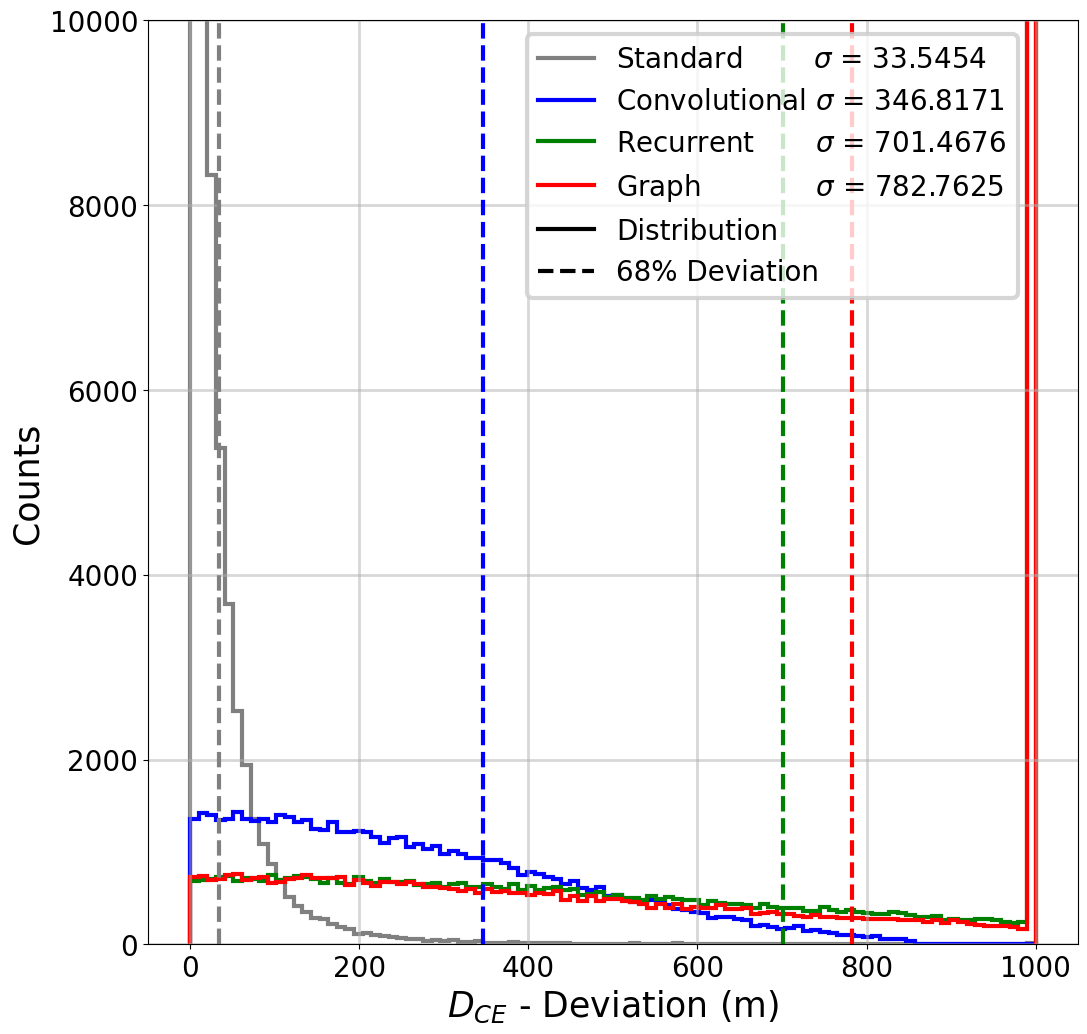

In [ ]:
# plt.style.use('default')
plt.style.use('AngularDeviation.mplstyle')

# Plotting the angular deviation for the SDP
plt.figure()
plt.stairs(  Rec_CEDist_Div_counts,  Rec_CEDist_Div_bin_edges, label='Rec'  , color=colors['Rec']  )
plt.stairs( Conv_CEDist_Div_counts, Conv_CEDist_Div_bin_edges, label='Conv' , color=colors['Conv'] )
plt.stairs( Recc_CEDist_Div_counts, Recc_CEDist_Div_bin_edges, label='Recc' , color=colors['Recc'] )
plt.stairs(Graph_CEDist_Div_counts,Graph_CEDist_Div_bin_edges,label='Graph' , color=colors['Graph'])

# Plotting the 68% deviation
plt.axvline(  Rec_CEDist_Div_sigma, color=colors['Rec'  ],linestyle='--')
plt.axvline( Conv_CEDist_Div_sigma, color=colors['Conv' ],linestyle='--')
plt.axvline( Recc_CEDist_Div_sigma, color=colors['Recc' ],linestyle='--')
plt.axvline(Graph_CEDist_Div_sigma, color=colors['Graph'],linestyle='--')

custom_lines = [Line2D([0], [0], color=colors['Rec']  ),
                Line2D([0], [0], color=colors['Conv'] ),
                Line2D([0], [0], color=colors['Recc'] ),
                Line2D([0], [0], color=colors['Graph']),
                Line2D([0], [0], color='black', linestyle='-'),
                Line2D([0], [0], color='black', linestyle='--')]

custom_labels = [f'Standard        $\sigma$ = {    Rec_CEDist_Div_sigma:.4f}',
                 f'Convolutional $\sigma$ = {     Conv_CEDist_Div_sigma:.4f}',
                 f'Recurrent       $\sigma$ = {   Recc_CEDist_Div_sigma:.4f}',
                 f'Graph             $\sigma$ = {Graph_CEDist_Div_sigma:.4f}',
                  'Distribution','68% Deviation']

plt.legend(custom_lines, custom_labels,bbox_to_anchor=(0.95, 1))
plt.xlabel('$D_{CE}$ - Deviation (m)')
plt.ylabel('Counts')
plt.ylim(0,10000)
# plt.xlim(0,3.1)
plt.savefig('CEDistDistribution.pdf')

# R_p un-re-normalization

In [ ]:
try:# R_p error histograms

    # plt.figure(figsize=(15,15))
    X  = Truth_Rp
    Yp = Pred_Rp
    Yr = Rec_Rp

    E_p = np.abs(Yp-X)
    E_r = np.abs(Yr-X)

    # Make cut on 99% of the Pred Data (assuming its larger than the Rec Data)
    cut = np.percentile(E_p,99)
    cut = E_p<cut

    E_p = E_p[cut]
    E_r = E_r[cut]

    if TruthUnits[TruthKeys.index('CEDist')] == 'km':
            E_p = E_p*1000
            E_r = E_r*1000

    nbins = 100
    Range = (0,1000)

    bins = np.concatenate([np.linspace(Range[0], Range[1], nbins-1), [np.inf]])

    plt.figure(figsize = (10,10))

    counts,bin_edges = np.histogram(E_p,bins=bins)
    print('Model Values')
    print('Counts',counts.tolist())
    print('Bin Edges',bin_edges.tolist())
    counts[-2] += counts[-1]
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    plt.bar(bin_centers[:-1], counts[:-1], width=np.diff(bin_edges[:-1]), align="edge", label='Model',color = 'firebrick')

    counts,bin_edges = np.histogram(E_r,bins=bins)
    print('Reconstruction Values')
    print('Counts',counts.tolist())
    print('Bin Edges',bin_edges.tolist())
    counts[-2] += counts[-1]
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    plt.bar(bin_centers[:-1], counts[:-1], width=np.diff(bin_edges[:-1]), align="edge", label='Reconstruction',color='dodgerblue',alpha = 0.5)

    # Plot the 68% vlines
    plt.axvline(np.percentile(E_r,68), color='dodgerblue', linestyle='--',label = 'Reconstruction 68%')
    plt.axvline(np.percentile(E_p,68), color='firebrick' , linestyle='--',label = 'Model 68%')

    print('Sigma Pred:',np.percentile(E_p,68))
    print('Sigma Rec:',np.percentile(E_r,68))


    plt.xlabel(f'Rp Error (m)')
    plt.ylabel('Counts')
    plt.legend()
    plt.grid()
    plt.show()


except:
    pass

In [ ]:
# Load the data (if any prints are false, this is bad)
Rec_Rp_Div_counts      = np.array([15717, 11744, 7647, 5237, 3677, 2771, 2140, 1592, 1325, 1045, 871, 732, 658, 557, 462, 398, 362, 356, 312, 243, 236, 213, 217, 172, 151, 145, 118, 121, 103, 104, 86, 103, 77, 79, 77, 62, 60, 52, 43, 53, 65, 41, 48, 31, 34, 43, 30, 30, 25, 26, 25, 24, 25, 21, 15, 16, 16, 14, 16, 9, 13, 12, 10, 8, 13, 12, 12, 14, 13, 9, 10, 9, 7, 6, 7, 8, 3, 9, 6, 9, 6, 7, 2, 1, 3, 4, 3, 7, 6, 3, 2, 5, 3, 5, 6, 7, 4, 3, 64])
Rec_Rp_Div_bin_edges   = np.array([0.0, 10.204081632653061, 20.408163265306122, 30.612244897959183, 40.816326530612244, 51.0204081632653, 61.224489795918366, 71.42857142857143, 81.63265306122449, 91.83673469387755, 102.0408163265306, 112.24489795918367, 122.44897959183673, 132.6530612244898, 142.85714285714286, 153.0612244897959, 163.26530612244898, 173.46938775510205, 183.6734693877551, 193.87755102040816, 204.0816326530612, 214.28571428571428, 224.48979591836735, 234.6938775510204, 244.89795918367346, 255.10204081632654, 265.3061224489796, 275.51020408163265, 285.7142857142857, 295.9183673469388, 306.1224489795918, 316.3265306122449, 326.53061224489795, 336.734693877551, 346.9387755102041, 357.1428571428571, 367.3469387755102, 377.55102040816325, 387.7551020408163, 397.9591836734694, 408.1632653061224, 418.3673469387755, 428.57142857142856, 438.7755102040816, 448.9795918367347, 459.18367346938777, 469.3877551020408, 479.59183673469386, 489.7959183673469, 500.0, 510.2040816326531, 520.4081632653061, 530.6122448979592, 540.8163265306123, 551.0204081632653, 561.2244897959183, 571.4285714285714, 581.6326530612245, 591.8367346938776, 602.0408163265306, 612.2448979591836, 622.4489795918367, 632.6530612244898, 642.8571428571429, 653.0612244897959, 663.2653061224489, 673.469387755102, 683.6734693877551, 693.8775510204082, 704.0816326530612, 714.2857142857142, 724.4897959183673, 734.6938775510204, 744.8979591836735, 755.1020408163265, 765.3061224489795, 775.5102040816327, 785.7142857142857, 795.9183673469388, 806.1224489795918, 816.3265306122448, 826.530612244898, 836.734693877551, 846.9387755102041, 857.1428571428571, 867.3469387755102, 877.5510204081633, 887.7551020408163, 897.9591836734694, 908.1632653061224, 918.3673469387755, 928.5714285714286, 938.7755102040816, 948.9795918367347, 959.1836734693877, 969.3877551020408, 979.5918367346939, 989.7959183673469, 1000.0])
Rec_Rp_Div_sigma       = 43.63666534423828

Conv_Rp_Div_counts     = np.array([1574, 1601, 1523, 1561, 1569, 1514, 1571, 1563, 1456, 1486, 1402, 1455, 1420, 1338, 1351, 1418, 1274, 1313, 1258, 1195, 1165, 1168, 1098, 1091, 1077, 1077, 1017, 978, 981, 933, 948, 842, 845, 819, 793, 728, 735, 701, 683, 638, 658, 652, 550, 571, 565, 529, 473, 459, 478, 440, 386, 432, 366, 374, 351, 362, 316, 314, 262, 264, 233, 261, 229, 219, 211, 233, 194, 189, 163, 173, 165, 160, 188, 143, 142, 143, 130, 126, 93, 113, 96, 84, 90, 90, 86, 76, 75, 54, 68, 61, 50, 58, 55, 66, 48, 51, 46, 37, 343])
Conv_Rp_Div_bin_edges  = np.array([0.0, 10.204081632653061, 20.408163265306122, 30.612244897959183, 40.816326530612244, 51.0204081632653, 61.224489795918366, 71.42857142857143, 81.63265306122449, 91.83673469387755, 102.0408163265306, 112.24489795918367, 122.44897959183673, 132.6530612244898, 142.85714285714286, 153.0612244897959, 163.26530612244898, 173.46938775510205, 183.6734693877551, 193.87755102040816, 204.0816326530612, 214.28571428571428, 224.48979591836735, 234.6938775510204, 244.89795918367346, 255.10204081632654, 265.3061224489796, 275.51020408163265, 285.7142857142857, 295.9183673469388, 306.1224489795918, 316.3265306122449, 326.53061224489795, 336.734693877551, 346.9387755102041, 357.1428571428571, 367.3469387755102, 377.55102040816325, 387.7551020408163, 397.9591836734694, 408.1632653061224, 418.3673469387755, 428.57142857142856, 438.7755102040816, 448.9795918367347, 459.18367346938777, 469.3877551020408, 479.59183673469386, 489.7959183673469, 500.0, 510.2040816326531, 520.4081632653061, 530.6122448979592, 540.8163265306123, 551.0204081632653, 561.2244897959183, 571.4285714285714, 581.6326530612245, 591.8367346938776, 602.0408163265306, 612.2448979591836, 622.4489795918367, 632.6530612244898, 642.8571428571429, 653.0612244897959, 663.2653061224489, 673.469387755102, 683.6734693877551, 693.8775510204082, 704.0816326530612, 714.2857142857142, 724.4897959183673, 734.6938775510204, 744.8979591836735, 755.1020408163265, 765.3061224489795, 775.5102040816327, 785.7142857142857, 795.9183673469388, 806.1224489795918, 816.3265306122448, 826.530612244898, 836.734693877551, 846.9387755102041, 857.1428571428571, 867.3469387755102, 877.5510204081633, 887.7551020408163, 897.9591836734694, 908.1632653061224, 918.3673469387755, 928.5714285714286, 938.7755102040816, 948.9795918367347, 959.1836734693877, 969.3877551020408, 979.5918367346939, 989.7959183673469, 1000.0])
Conv_Rp_Div_sigma      = 329.954296875

Recc_Rp_Div_counts     = np.array([696, 721, 707, 690, 718, 699, 710, 721, 669, 721, 719, 704, 674, 683, 661, 673, 688, 697, 688, 708, 647, 671, 688, 649, 667, 650, 641, 605, 606, 562, 631, 655, 623, 603, 540, 584, 585, 555, 560, 593, 528, 597, 585, 595, 527, 517, 550, 524, 472, 477, 499, 450, 487, 466, 497, 463, 481, 433, 435, 425, 384, 404, 395, 376, 385, 402, 391, 387, 387, 351, 387, 332, 338, 348, 352, 318, 354, 332, 365, 322, 306, 293, 284, 272, 272, 310, 258, 287, 264, 273, 256, 239, 232, 236, 227, 222, 267, 254, 12671])
Recc_Rp_Div_bin_edges  = np.array([0.0, 10.204081632653061, 20.408163265306122, 30.612244897959183, 40.816326530612244, 51.0204081632653, 61.224489795918366, 71.42857142857143, 81.63265306122449, 91.83673469387755, 102.0408163265306, 112.24489795918367, 122.44897959183673, 132.6530612244898, 142.85714285714286, 153.0612244897959, 163.26530612244898, 173.46938775510205, 183.6734693877551, 193.87755102040816, 204.0816326530612, 214.28571428571428, 224.48979591836735, 234.6938775510204, 244.89795918367346, 255.10204081632654, 265.3061224489796, 275.51020408163265, 285.7142857142857, 295.9183673469388, 306.1224489795918, 316.3265306122449, 326.53061224489795, 336.734693877551, 346.9387755102041, 357.1428571428571, 367.3469387755102, 377.55102040816325, 387.7551020408163, 397.9591836734694, 408.1632653061224, 418.3673469387755, 428.57142857142856, 438.7755102040816, 448.9795918367347, 459.18367346938777, 469.3877551020408, 479.59183673469386, 489.7959183673469, 500.0, 510.2040816326531, 520.4081632653061, 530.6122448979592, 540.8163265306123, 551.0204081632653, 561.2244897959183, 571.4285714285714, 581.6326530612245, 591.8367346938776, 602.0408163265306, 612.2448979591836, 622.4489795918367, 632.6530612244898, 642.8571428571429, 653.0612244897959, 663.2653061224489, 673.469387755102, 683.6734693877551, 693.8775510204082, 704.0816326530612, 714.2857142857142, 724.4897959183673, 734.6938775510204, 744.8979591836735, 755.1020408163265, 765.3061224489795, 775.5102040816327, 785.7142857142857, 795.9183673469388, 806.1224489795918, 816.3265306122448, 826.530612244898, 836.734693877551, 846.9387755102041, 857.1428571428571, 867.3469387755102, 877.5510204081633, 887.7551020408163, 897.9591836734694, 908.1632653061224, 918.3673469387755, 928.5714285714286, 938.7755102040816, 948.9795918367347, 959.1836734693877, 969.3877551020408, 979.5918367346939, 989.7959183673469, 1000.0])
Recc_Rp_Div_sigma      = 753.3184741210938

Graph_Rp_Div_counts    = np.array([828, 793, 793, 797, 798, 770, 807, 833, 806, 834, 807, 809, 752, 781, 776, 725, 749, 791, 750, 709, 693, 648, 692, 625, 713, 660, 708, 681, 633, 623, 660, 581, 623, 571, 617, 557, 588, 558, 561, 549, 550, 554, 509, 517, 520, 467, 463, 475, 486, 480, 454, 453, 427, 454, 412, 400, 392, 376, 396, 387, 387, 382, 372, 393, 368, 338, 344, 333, 360, 356, 324, 305, 276, 306, 329, 288, 299, 262, 254, 287, 265, 261, 259, 251, 255, 257, 264, 237, 202, 221, 232, 224, 226, 224, 224, 211, 217, 190, 12799])
Graph_Rp_Div_bin_edges = np.array([0.0, 10.204081632653061, 20.408163265306122, 30.612244897959183, 40.816326530612244, 51.0204081632653, 61.224489795918366, 71.42857142857143, 81.63265306122449, 91.83673469387755, 102.0408163265306, 112.24489795918367, 122.44897959183673, 132.6530612244898, 142.85714285714286, 153.0612244897959, 163.26530612244898, 173.46938775510205, 183.6734693877551, 193.87755102040816, 204.0816326530612, 214.28571428571428, 224.48979591836735, 234.6938775510204, 244.89795918367346, 255.10204081632654, 265.3061224489796, 275.51020408163265, 285.7142857142857, 295.9183673469388, 306.1224489795918, 316.3265306122449, 326.53061224489795, 336.734693877551, 346.9387755102041, 357.1428571428571, 367.3469387755102, 377.55102040816325, 387.7551020408163, 397.9591836734694, 408.1632653061224, 418.3673469387755, 428.57142857142856, 438.7755102040816, 448.9795918367347, 459.18367346938777, 469.3877551020408, 479.59183673469386, 489.7959183673469, 500.0, 510.2040816326531, 520.4081632653061, 530.6122448979592, 540.8163265306123, 551.0204081632653, 561.2244897959183, 571.4285714285714, 581.6326530612245, 591.8367346938776, 602.0408163265306, 612.2448979591836, 622.4489795918367, 632.6530612244898, 642.8571428571429, 653.0612244897959, 663.2653061224489, 673.469387755102, 683.6734693877551, 693.8775510204082, 704.0816326530612, 714.2857142857142, 724.4897959183673, 734.6938775510204, 744.8979591836735, 755.1020408163265, 765.3061224489795, 775.5102040816327, 785.7142857142857, 795.9183673469388, 806.1224489795918, 816.3265306122448, 826.530612244898, 836.734693877551, 846.9387755102041, 857.1428571428571, 867.3469387755102, 877.5510204081633, 887.7551020408163, 897.9591836734694, 908.1632653061224, 918.3673469387755, 928.5714285714286, 938.7755102040816, 948.9795918367347, 959.1836734693877, 969.3877551020408, 979.5918367346939, 989.7959183673469, 1000.0])
Graph_Rp_Div_sigma     = 727.9908544921875


# Compute the overflow bin
Rec_Rp_Div_counts [-2] += Rec_Rp_Div_counts [-1]
Conv_Rp_Div_counts[-2] += Conv_Rp_Div_counts[-1]
Recc_Rp_Div_counts[-2] += Recc_Rp_Div_counts[-1]
Graph_Rp_Div_counts[-2]+= Graph_Rp_Div_counts[-1]
Rec_Rp_Div_counts   = Rec_Rp_Div_counts [:-1]
Conv_Rp_Div_counts  = Conv_Rp_Div_counts[:-1]
Recc_Rp_Div_counts  = Recc_Rp_Div_counts[:-1]
Graph_Rp_Div_counts = Graph_Rp_Div_counts[:-1]


# Confirm the bin_edges are the same
print(np.all(Rec_Rp_Div_bin_edges ==  Conv_Rp_Div_bin_edges))
print(np.all(Rec_Rp_Div_bin_edges ==  Recc_Rp_Div_bin_edges))
print(np.all(Rec_Rp_Div_bin_edges == Graph_Rp_Div_bin_edges))


True
True
True


In [ ]:
# Check total counts
print(f'Total Counts Rec: {  np.sum(  Rec_SDP_AngDiv_counts)}')
print(f'Total Counts Conv: { np.sum( Conv_SDP_AngDiv_counts)}')
print(f'Total Counts Recc: { np.sum( Recc_SDP_AngDiv_counts)}')
print(f'Total Counts Graph: {np.sum(Graph_SDP_AngDiv_counts)}')


Total Counts Rec: 61620
Total Counts Conv: 61620
Total Counts Recc: 61620
Total Counts Graph: 61620


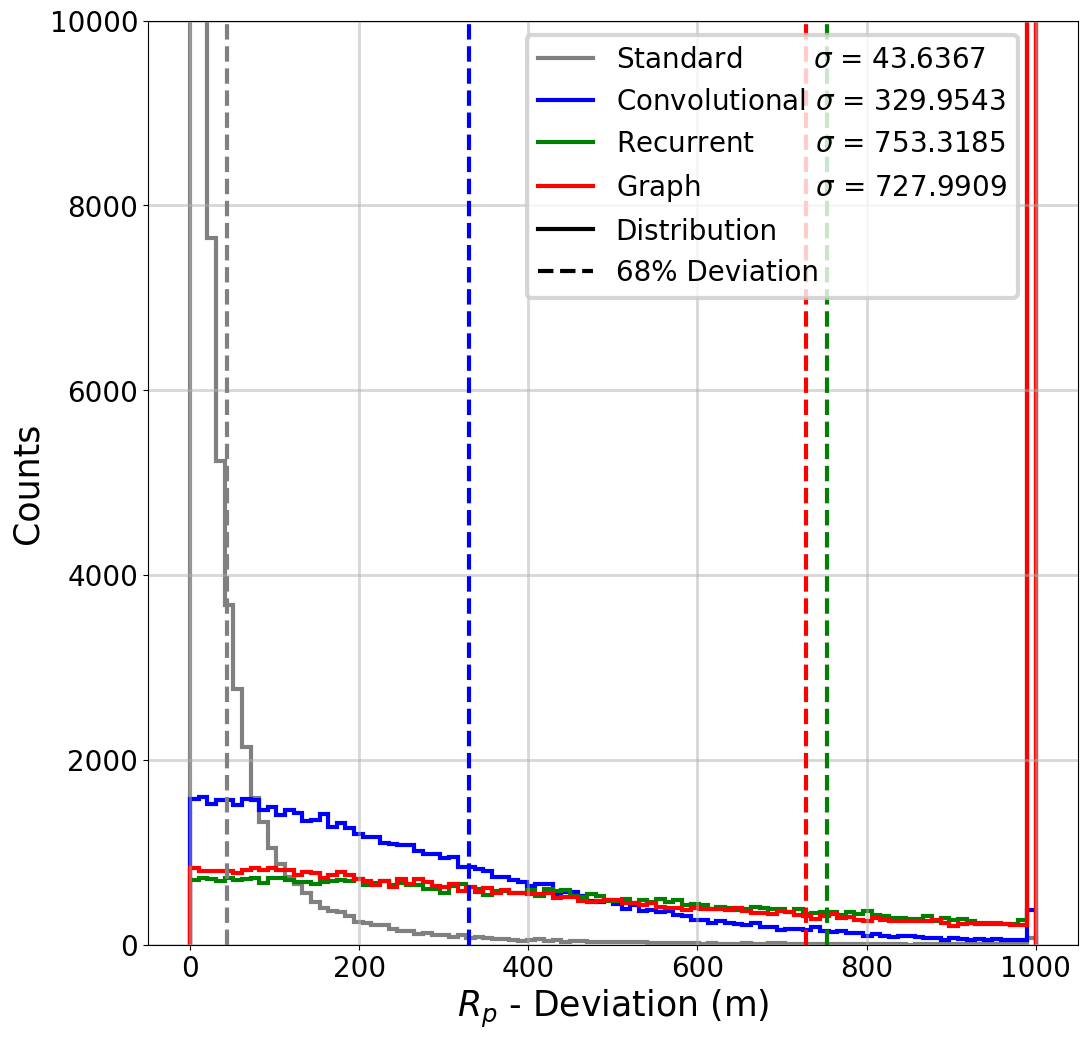

In [ ]:
# plt.style.use('default')
plt.style.use('AngularDeviation.mplstyle')

# Plotting the angular deviation for the SDP
plt.figure()
plt.stairs(Rec_Rp_Div_counts, Rec_Rp_Div_bin_edges, label='Rec', color=colors['Rec'])
plt.stairs(Conv_Rp_Div_counts, Conv_Rp_Div_bin_edges, label='Conv', color=colors['Conv'])
plt.stairs(Recc_Rp_Div_counts, Recc_Rp_Div_bin_edges, label='Recc', color=colors['Recc'])
plt.stairs(Graph_Rp_Div_counts, Graph_Rp_Div_bin_edges, label='Graph', color=colors['Graph'])

# Plotting the 68% deviation
plt.axvline(Rec_Rp_Div_sigma, color=colors['Rec'], linestyle='--')
plt.axvline(Conv_Rp_Div_sigma, color=colors['Conv'], linestyle='--')
plt.axvline(Recc_Rp_Div_sigma, color=colors['Recc'], linestyle='--')
plt.axvline(Graph_Rp_Div_sigma, color=colors['Graph'], linestyle='--')

custom_lines = [Line2D([0], [0], color=colors['Rec']),
                Line2D([0], [0], color=colors['Conv']),
                Line2D([0], [0], color=colors['Recc']),
                Line2D([0], [0], color=colors['Graph']),
                Line2D([0], [0], color='black', linestyle='-'),
                Line2D([0], [0], color='black', linestyle='--')]

custom_labels = [f'Standard        $\sigma$ = {Rec_Rp_Div_sigma:.4f}',
                 f'Convolutional $\sigma$ = {Conv_Rp_Div_sigma:.4f}',
                 f'Recurrent       $\sigma$ = {Recc_Rp_Div_sigma:.4f}',
                 f'Graph             $\sigma$ = {Graph_Rp_Div_sigma:.4f}',
                 'Distribution', '68% Deviation']

plt.legend(custom_lines, custom_labels, bbox_to_anchor=(0.95, 1))
plt.xlabel('$R_{p}$ - Deviation (m)')
plt.ylabel('Counts')
plt.ylim(0, 10000)
# plt.xlim(0,3.1)
plt.savefig('RpDistribution.pdf')

# Chi_0 un-re-normalization

In [ ]:
try:# Chi 0 error histograms

    plt.figure(figsize=(15,15))
    X  = Truth_Chi_0
    Yp = Pred_Chi_0
    Yr = Rec_Chi_0

    E_p = np.abs(Yp-X)
    E_r = np.abs(Yr-X)

    # Make cut on 99% of the Pred Data (assuming its larger than the Rec Data)
    cut = np.percentile(E_p,99)
    cut = E_p<cut

    E_p = E_p[cut]
    E_r = E_r[cut]

    E_p = np.rad2deg(E_p)
    E_r = np.rad2deg(E_r)

    nbins = 100
    Range = (0,6)

    bins = np.concatenate([np.linspace(Range[0], Range[1], nbins-1), [np.inf]])

    plt.figure(figsize = (10,10))

    counts,bin_edges = np.histogram(E_p,bins=bins)
    print('Model Values')
    print('Counts',counts.tolist())
    print('Bin Edges',bin_edges.tolist())
    counts[-2] += counts[-1]
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    plt.bar(bin_centers[:-1], counts[:-1], width=np.diff(bin_edges[:-1]), align="edge", label='Model',color = 'firebrick')

    counts,bin_edges = np.histogram(E_r,bins=bins)
    print('Reconstruction Values')
    print('Counts',counts.tolist())
    print('Bin Edges',bin_edges.tolist())
    counts[-2] += counts[-1]
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    plt.bar(bin_centers[:-1], counts[:-1], width=np.diff(bin_edges[:-1]), align="edge", label='Reconstruction',color = 'dodgerblue',alpha = 0.5)

    # Plot the 68% vlines
    plt.axvline(np.percentile(E_r,68), color='dodgerblue', linestyle='--',label = 'Reconstruction 68%')
    plt.axvline(np.percentile(E_p,68), color='firebrick' , linestyle='--',label = 'Model 68%')
    print('Sigma Pred:',np.percentile(E_p,68))
    print('Sigma Rec:',np.percentile(E_r,68))

    plt.xlabel('Chi 0 Error (deg)')
    plt.ylabel('Counts')
    plt.legend()
    plt.grid()
    plt.show()
except:
    pass

<Figure size 1500x1500 with 0 Axes>

In [ ]:
# Load the data (if any prints are false, this is bad)
Rec_Chi0_Div_counts      = np.array([5359, 6005, 7022, 7711, 7756, 6183, 4791, 3531, 2559, 1990, 1510, 1240, 951, 755, 630, 522, 451, 348, 265, 220, 204, 170, 130, 89, 96, 84, 60, 49, 46, 39, 31, 20, 11, 23, 28, 15, 11, 12, 9, 6, 8, 8, 1, 4, 3, 4, 4, 3, 7, 0, 4, 2, 4, 4, 3, 0, 1, 1, 0, 3, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])
Rec_Chi0_Div_bin_edges   = np.array([0.0, 0.061224489795918366, 0.12244897959183673, 0.18367346938775508, 0.24489795918367346, 0.30612244897959184, 0.36734693877551017, 0.42857142857142855, 0.4897959183673469, 0.5510204081632653, 0.6122448979591837, 0.673469387755102, 0.7346938775510203, 0.7959183673469388, 0.8571428571428571, 0.9183673469387755, 0.9795918367346939, 1.0408163265306123, 1.1020408163265305, 1.163265306122449, 1.2244897959183674, 1.2857142857142856, 1.346938775510204, 1.4081632653061225, 1.4693877551020407, 1.530612244897959, 1.5918367346938775, 1.653061224489796, 1.7142857142857142, 1.7755102040816326, 1.836734693877551, 1.8979591836734693, 1.9591836734693877, 2.020408163265306, 2.0816326530612246, 2.142857142857143, 2.204081632653061, 2.2653061224489797, 2.326530612244898, 2.387755102040816, 2.4489795918367347, 2.510204081632653, 2.571428571428571, 2.63265306122449, 2.693877551020408, 2.7551020408163263, 2.816326530612245, 2.877551020408163, 2.9387755102040813, 3.0, 3.061224489795918, 3.122448979591837, 3.183673469387755, 3.2448979591836733, 3.306122448979592, 3.36734693877551, 3.4285714285714284, 3.489795918367347, 3.5510204081632653, 3.6122448979591835, 3.673469387755102, 3.7346938775510203, 3.7959183673469385, 3.857142857142857, 3.9183673469387754, 3.9795918367346936, 4.040816326530612, 4.1020408163265305, 4.163265306122449, 4.224489795918367, 4.285714285714286, 4.346938775510204, 4.408163265306122, 4.469387755102041, 4.530612244897959, 4.591836734693877, 4.653061224489796, 4.714285714285714, 4.775510204081632, 4.836734693877551, 4.8979591836734695, 4.959183673469387, 5.020408163265306, 5.081632653061225, 5.142857142857142, 5.204081632653061, 5.26530612244898, 5.326530612244897, 5.387755102040816, 5.448979591836735, 5.5102040816326525, 5.571428571428571, 5.63265306122449, 5.693877551020408, 5.755102040816326, 5.816326530612245, 5.877551020408163, 5.938775510204081, 6.0])
Rec_Chi0_Div_sigma       = 0.38370006322860717

Conv_Chi0_Div_counts     = np.array([1912, 1917, 1908, 1867, 1828, 1868, 1788, 1881, 1788, 1788, 1697, 1618, 1675, 1542, 1503, 1440, 1424, 1364, 1355, 1277, 1239, 1206, 1181, 1135, 1113, 1072, 961, 929, 931, 884, 824, 833, 752, 728, 674, 708, 688, 606, 606, 574, 511, 534, 486, 449, 393, 389, 411, 411, 344, 336, 301, 311, 276, 247, 301, 245, 232, 212, 206, 196, 196, 165, 176, 157, 150, 161, 129, 106, 128, 108, 101, 76, 81, 109, 95, 86, 80, 57, 72, 70, 66, 57, 60, 71, 54, 54, 57, 51, 51, 33, 43, 39, 32, 25, 28, 31, 36, 21, 16])
Conv_Chi0_Div_bin_edges  = np.array([0.0, 0.061224489795918366, 0.12244897959183673, 0.18367346938775508, 0.24489795918367346, 0.30612244897959184, 0.36734693877551017, 0.42857142857142855, 0.4897959183673469, 0.5510204081632653, 0.6122448979591837, 0.673469387755102, 0.7346938775510203, 0.7959183673469388, 0.8571428571428571, 0.9183673469387755, 0.9795918367346939, 1.0408163265306123, 1.1020408163265305, 1.163265306122449, 1.2244897959183674, 1.2857142857142856, 1.346938775510204, 1.4081632653061225, 1.4693877551020407, 1.530612244897959, 1.5918367346938775, 1.653061224489796, 1.7142857142857142, 1.7755102040816326, 1.836734693877551, 1.8979591836734693, 1.9591836734693877, 2.020408163265306, 2.0816326530612246, 2.142857142857143, 2.204081632653061, 2.2653061224489797, 2.326530612244898, 2.387755102040816, 2.4489795918367347, 2.510204081632653, 2.571428571428571, 2.63265306122449, 2.693877551020408, 2.7551020408163263, 2.816326530612245, 2.877551020408163, 2.9387755102040813, 3.0, 3.061224489795918, 3.122448979591837, 3.183673469387755, 3.2448979591836733, 3.306122448979592, 3.36734693877551, 3.4285714285714284, 3.489795918367347, 3.5510204081632653, 3.6122448979591835, 3.673469387755102, 3.7346938775510203, 3.7959183673469385, 3.857142857142857, 3.9183673469387754, 3.9795918367346936, 4.040816326530612, 4.1020408163265305, 4.163265306122449, 4.224489795918367, 4.285714285714286, 4.346938775510204, 4.408163265306122, 4.469387755102041, 4.530612244897959, 4.591836734693877, 4.653061224489796, 4.714285714285714, 4.775510204081632, 4.836734693877551, 4.8979591836734695, 4.959183673469387, 5.020408163265306, 5.081632653061225, 5.142857142857142, 5.204081632653061, 5.26530612244898, 5.326530612244897, 5.387755102040816, 5.448979591836735, 5.5102040816326525, 5.571428571428571, 5.63265306122449, 5.693877551020408, 5.755102040816326, 5.816326530612245, 5.877551020408163, 5.938775510204081, 6.0])
Conv_Chi0_Div_sigma      = 1.6620108985900879

Recc_Chi0_Div_counts     = np.array([668, 680, 649, 654, 683, 707, 649, 674, 604, 637, 661, 704, 638, 688, 659, 624, 675, 656, 630, 621, 606, 614, 673, 661, 647, 601, 598, 634, 629, 607, 592, 615, 568, 613, 547, 585, 588, 549, 535, 534, 533, 511, 558, 509, 527, 552, 544, 538, 492, 501, 483, 520, 523, 546, 467, 449, 475, 447, 444, 416, 456, 485, 420, 457, 405, 415, 450, 401, 402, 408, 364, 402, 373, 390, 353, 356, 358, 337, 360, 347, 340, 309, 341, 344, 342, 324, 295, 273, 292, 277, 294, 254, 262, 300, 245, 281, 250, 234, 12615])
Recc_Chi0_Div_bin_edges  = np.array([0.0, 0.061224489795918366, 0.12244897959183673, 0.18367346938775508, 0.24489795918367346, 0.30612244897959184, 0.36734693877551017, 0.42857142857142855, 0.4897959183673469, 0.5510204081632653, 0.6122448979591837, 0.673469387755102, 0.7346938775510203, 0.7959183673469388, 0.8571428571428571, 0.9183673469387755, 0.9795918367346939, 1.0408163265306123, 1.1020408163265305, 1.163265306122449, 1.2244897959183674, 1.2857142857142856, 1.346938775510204, 1.4081632653061225, 1.4693877551020407, 1.530612244897959, 1.5918367346938775, 1.653061224489796, 1.7142857142857142, 1.7755102040816326, 1.836734693877551, 1.8979591836734693, 1.9591836734693877, 2.020408163265306, 2.0816326530612246, 2.142857142857143, 2.204081632653061, 2.2653061224489797, 2.326530612244898, 2.387755102040816, 2.4489795918367347, 2.510204081632653, 2.571428571428571, 2.63265306122449, 2.693877551020408, 2.7551020408163263, 2.816326530612245, 2.877551020408163, 2.9387755102040813, 3.0, 3.061224489795918, 3.122448979591837, 3.183673469387755, 3.2448979591836733, 3.306122448979592, 3.36734693877551, 3.4285714285714284, 3.489795918367347, 3.5510204081632653, 3.6122448979591835, 3.673469387755102, 3.7346938775510203, 3.7959183673469385, 3.857142857142857, 3.9183673469387754, 3.9795918367346936, 4.040816326530612, 4.1020408163265305, 4.163265306122449, 4.224489795918367, 4.285714285714286, 4.346938775510204, 4.408163265306122, 4.469387755102041, 4.530612244897959, 4.591836734693877, 4.653061224489796, 4.714285714285714, 4.775510204081632, 4.836734693877551, 4.8979591836734695, 4.959183673469387, 5.020408163265306, 5.081632653061225, 5.142857142857142, 5.204081632653061, 5.26530612244898, 5.326530612244897, 5.387755102040816, 5.448979591836735, 5.5102040816326525, 5.571428571428571, 5.63265306122449, 5.693877551020408, 5.755102040816326, 5.816326530612245, 5.877551020408163, 5.938775510204081, 6.0])
Recc_Chi0_Div_sigma      = 4.611649837493896

Graph_Chi0_Div_counts    = np.array([1049, 1069, 1076, 1105, 1021, 1055, 1087, 1048, 977, 1037, 1063, 1021, 1013, 1016, 1034, 977, 994, 957, 946, 926, 899, 874, 928, 894, 894, 852, 824, 890, 777, 801, 797, 781, 768, 796, 752, 687, 695, 638, 695, 666, 638, 673, 622, 608, 575, 591, 585, 553, 517, 475, 526, 499, 464, 464, 473, 449, 449, 456, 397, 411, 370, 370, 394, 384, 329, 337, 326, 313, 325, 292, 272, 302, 254, 283, 276, 276, 262, 216, 246, 222, 231, 223, 219, 211, 180, 198, 176, 190, 209, 160, 183, 167, 163, 156, 169, 147, 141, 147, 4880])
Graph_Chi0_Div_bin_edges = np.array([0.0, 0.061224489795918366, 0.12244897959183673, 0.18367346938775508, 0.24489795918367346, 0.30612244897959184, 0.36734693877551017, 0.42857142857142855, 0.4897959183673469, 0.5510204081632653, 0.6122448979591837, 0.673469387755102, 0.7346938775510203, 0.7959183673469388, 0.8571428571428571, 0.9183673469387755, 0.9795918367346939, 1.0408163265306123, 1.1020408163265305, 1.163265306122449, 1.2244897959183674, 1.2857142857142856, 1.346938775510204, 1.4081632653061225, 1.4693877551020407, 1.530612244897959, 1.5918367346938775, 1.653061224489796, 1.7142857142857142, 1.7755102040816326, 1.836734693877551, 1.8979591836734693, 1.9591836734693877, 2.020408163265306, 2.0816326530612246, 2.142857142857143, 2.204081632653061, 2.2653061224489797, 2.326530612244898, 2.387755102040816, 2.4489795918367347, 2.510204081632653, 2.571428571428571, 2.63265306122449, 2.693877551020408, 2.7551020408163263, 2.816326530612245, 2.877551020408163, 2.9387755102040813, 3.0, 3.061224489795918, 3.122448979591837, 3.183673469387755, 3.2448979591836733, 3.306122448979592, 3.36734693877551, 3.4285714285714284, 3.489795918367347, 3.5510204081632653, 3.6122448979591835, 3.673469387755102, 3.7346938775510203, 3.7959183673469385, 3.857142857142857, 3.9183673469387754, 3.9795918367346936, 4.040816326530612, 4.1020408163265305, 4.163265306122449, 4.224489795918367, 4.285714285714286, 4.346938775510204, 4.408163265306122, 4.469387755102041, 4.530612244897959, 4.591836734693877, 4.653061224489796, 4.714285714285714, 4.775510204081632, 4.836734693877551, 4.8979591836734695, 4.959183673469387, 5.020408163265306, 5.081632653061225, 5.142857142857142, 5.204081632653061, 5.26530612244898, 5.326530612244897, 5.387755102040816, 5.448979591836735, 5.5102040816326525, 5.571428571428571, 5.63265306122449, 5.693877551020408, 5.755102040816326, 5.816326530612245, 5.877551020408163, 5.938775510204081, 6.0])
Graph_Chi0_Div_sigma     = 2.968196783065796


# Compute the overflow bin
Rec_Chi0_Div_counts [-2] += Rec_Chi0_Div_counts [-1]
Conv_Chi0_Div_counts[-2] += Conv_Chi0_Div_counts[-1]
Recc_Chi0_Div_counts[-2] += Recc_Chi0_Div_counts[-1]
Graph_Chi0_Div_counts[-2]+= Graph_Chi0_Div_counts[-1]
Rec_Chi0_Div_counts   = Rec_Chi0_Div_counts [:-1]
Conv_Chi0_Div_counts  = Conv_Chi0_Div_counts[:-1]
Recc_Chi0_Div_counts  = Recc_Chi0_Div_counts[:-1]
Graph_Chi0_Div_counts = Graph_Chi0_Div_counts[:-1]


# Confirm the bin_edges are the same
print(np.all(Rec_Chi0_Div_bin_edges ==  Conv_Chi0_Div_bin_edges))
print(np.all(Rec_Chi0_Div_bin_edges ==  Recc_Chi0_Div_bin_edges))
print(np.all(Rec_Chi0_Div_bin_edges == Graph_Chi0_Div_bin_edges))


True
True
True


In [ ]:
# Check total counts
print(f'Total Counts Rec: {  np.sum(  Rec_SDP_AngDiv_counts)}')
print(f'Total Counts Conv: { np.sum( Conv_SDP_AngDiv_counts)}')
print(f'Total Counts Recc: { np.sum( Recc_SDP_AngDiv_counts)}')
print(f'Total Counts Graph: {np.sum(Graph_SDP_AngDiv_counts)}')


Total Counts Rec: 61620
Total Counts Conv: 61620
Total Counts Recc: 61620
Total Counts Graph: 61620


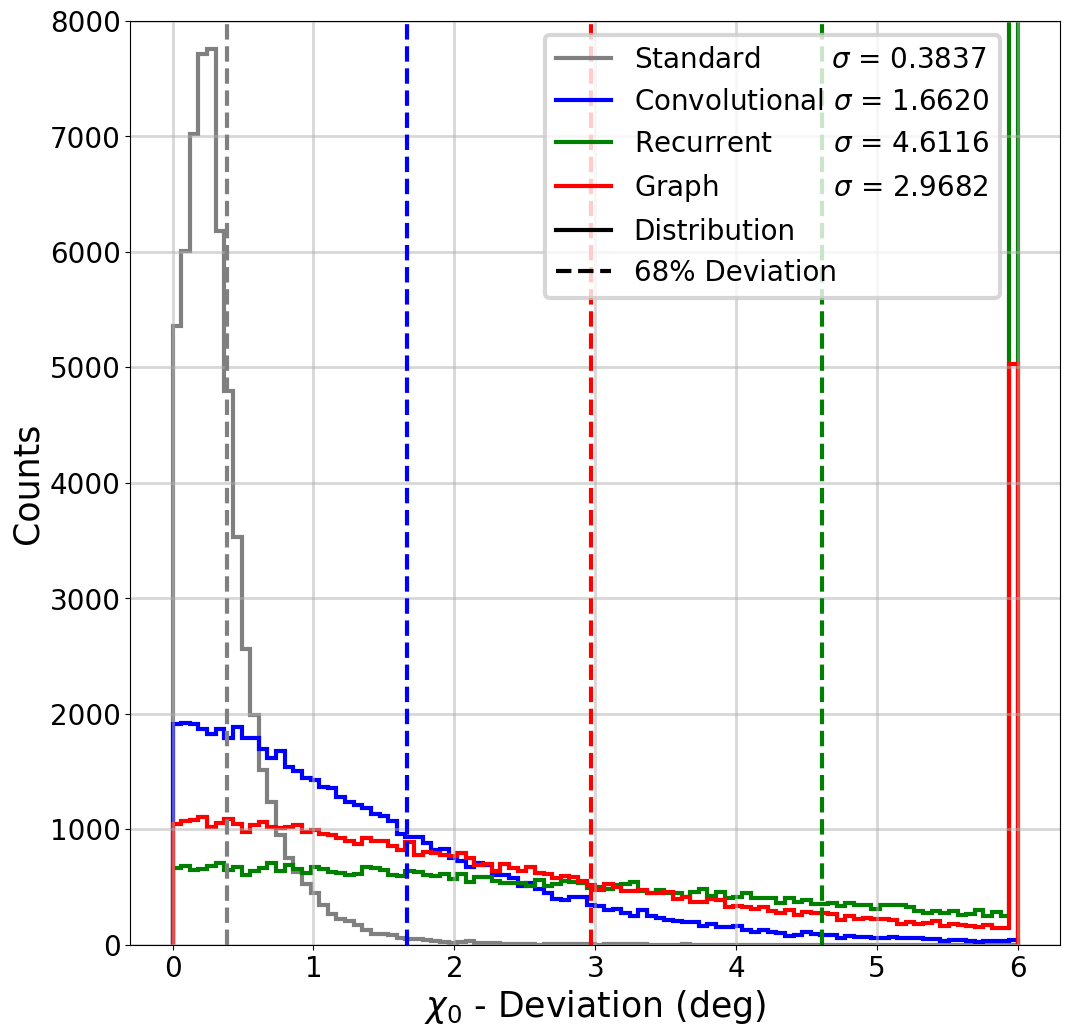

In [ ]:
# plt.style.use('default')
plt.style.use('AngularDeviation.mplstyle')

# Plotting the angular deviation for the SDP
plt.figure()
plt.stairs(Rec_Chi0_Div_counts, Rec_Chi0_Div_bin_edges, label='Rec', color=colors['Rec'])
plt.stairs(Conv_Chi0_Div_counts, Conv_Chi0_Div_bin_edges, label='Conv', color=colors['Conv'])
plt.stairs(Recc_Chi0_Div_counts, Recc_Chi0_Div_bin_edges, label='Recc', color=colors['Recc'])
plt.stairs(Graph_Chi0_Div_counts, Graph_Chi0_Div_bin_edges, label='Graph', color=colors['Graph'])

# Plotting the 68% deviation
plt.axvline(Rec_Chi0_Div_sigma, color=colors['Rec'], linestyle='--')
plt.axvline(Conv_Chi0_Div_sigma, color=colors['Conv'], linestyle='--')
plt.axvline(Recc_Chi0_Div_sigma, color=colors['Recc'], linestyle='--')
plt.axvline(Graph_Chi0_Div_sigma, color=colors['Graph'], linestyle='--')

custom_lines = [Line2D([0], [0], color=colors['Rec']),
                Line2D([0], [0], color=colors['Conv']),
                Line2D([0], [0], color=colors['Recc']),
                Line2D([0], [0], color=colors['Graph']),
                Line2D([0], [0], color='black', linestyle='-'),
                Line2D([0], [0], color='black', linestyle='--')]

custom_labels = [f'Standard        $\sigma$ = {Rec_Chi0_Div_sigma:.4f}',
                 f'Convolutional $\sigma$ = {Conv_Chi0_Div_sigma:.4f}',
                 f'Recurrent       $\sigma$ = {Recc_Chi0_Div_sigma:.4f}',
                 f'Graph             $\sigma$ = {Graph_Chi0_Div_sigma:.4f}',
                 'Distribution', '68% Deviation']

plt.legend(custom_lines, custom_labels, bbox_to_anchor=(0.95, 1))
plt.xlabel('$\chi_0$ - Deviation (deg)')
plt.ylabel('Counts')
plt.ylim(0, 8000)
# plt.xlim(0,3.1)
plt.savefig('Chi0Distribution.pdf')
